<a href="https://colab.research.google.com/github/perfectporfoliopablo/Curso-Lenguaje-Orientado-a-objetos-y-bases-de-datos/blob/main/TUTORIAL_SKLEARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***SHALLOW LEARNING***#

HAY DOS GRANDES GRUPOS; SUPERVISED O UNSUPERVISED.

##1.- **SUPERVISED LEARNING.**
NECESITAN DATOS ETIQUETADOS. SI POR EJEMPLO ESTAMOS CLASIFICANDO IMAGENES
NECESITAMOS EJEMPLOS DE LAS IMAGENES Y LA CLASE QUE TENEMOS QUE DARLE A CADA
IMAGEN, ESTO LLEVA TIEMPO, ES DIFICIL, NECESITAS GENTE QUE HAGA ESO

###1.1 REGRESION.
####VARIOS PROYECTOS

###1.2 CLASIFICACION.
####VARIOS PROYECTOS

##2.- **UNSUPERVISED LEARNING.**
NO NECESITA DATOS ETIQUETADOS, SOLO CON DATOS NO ETIQUETADOS DE FORMA NO SUPERVISADA, ALGO APRENDEN TAMBIEN LOS ALGORITMOS.

###2.1 CLUSTERING. AGRUPAR DATOS EN DIFERENTES GRUPOS QUE PUEDAN SERVIR PARA RESOLVER UNA TAREA
####VARIOS PROYECTOS

La regresi√≥n se utiliza para predecir un valor continuo en funci√≥n de uno o m√°s
valores de entrada. Un ejemplo de esto ser√≠a predecir el precio de una casa basado en caracter√≠sticas como su ubicaci√≥n, el n√∫mero de habitaciones, el tama√±o del lote, etc. Los algoritmos de regresi√≥n intentan trazar una l√≠nea (o una superficie, en el caso de m√∫ltiples variables de entrada) que modela la relaci√≥n entre las entradas y la salida. Los modelos de regresi√≥n m√°s comunes incluyen la regresi√≥n lineal.

# 1.- MODELO REGRESION LINEAL UNA VARIABLE

In [ ]:
# Importamos las librer√≠as

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget -O country_stats.csv https://raw.githubusercontent.com/CharlieScot/Inteligencia-Artificial/main/MODULO_4/country_stats.csv

--2024-04-28 17:27:20--  https://raw.githubusercontent.com/CharlieScot/Inteligencia-Artificial/main/MODULO_4/country_stats.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 715 [text/plain]
Saving to: ‚Äòcountry_stats.csv‚Äô

country_stats.csv   100%[===================>]     715  --.-KB/s    in 0s      

2024-04-28 17:27:20 (59.4 MB/s) - ‚Äòcountry_stats.csv‚Äô saved [715/715]



In [ ]:
# Creamos Dataframe com Pandas leyendo el archivo csv

df=pd.read_csv('country_stats.csv')

df

Pais  PIB per capita  Indice de felicidad
0            Russia        9054.914                  6.0
1            Turkey        9437.372                  5.6
2           Hungary       12239.893                  4.9
3            Poland       12495.333                  5.8
4   Slovak Republic       15991.736                  6.1
5           Estonia       17288.083                  5.6
6            Greece       18064.288                  4.8
7          Portugal       19121.592                  5.1
8          Slovenia       20732.482                  5.7
9             Spain       25864.721                  6.5
10            Korea       27195.197                  5.8
11            Italy       29866.581                  6.0
12            Japan       32485.545                  5.9
13           Israel       35343.336                  7.4
14      New Zealand       37044.891                  7.3
15           France       37675.006                  6.5
16          Belgium       40106.632                  6.9
17          Germany       40996.511                  7.0
18          Finland       41973.988                  7.4
19           Canada       43331.960                  7.3
20      Netherlands       43603.115                  7.3
21          Austria       43724.030                  6.9
22   United Kingdom       43770.687                  6.8
23           Sweden       49866.265                  7.2
24          Iceland       50854.583                  7.5
25        Australia       50961.865                  7.3
26          Ireland       51350.744                  7.0
27          Denmark       52114.165                  7.5
28    United States       55805.204                  7.2

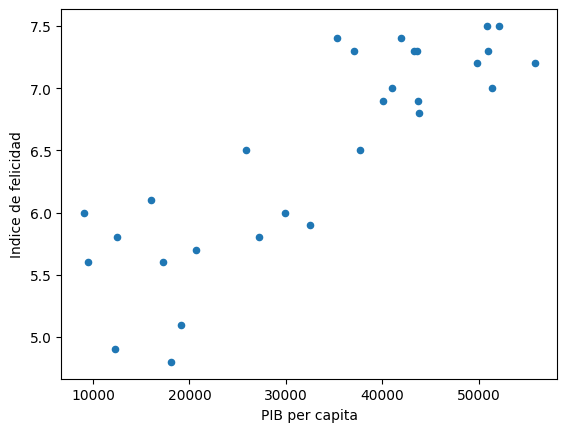

In [ ]:
# Visualizaci√≥n de la data usando la librer√≠a Matplotlib

df.plot(kind= 'scatter', x='PIB per capita', y='Indice de felicidad')

plt.show()

In [ ]:
# Parece que se ve una tendencia que indica que cuanto mayor es el PIB de un pais
# mas satisfecha esta la gente
# Vamos a desarrollar un modelo que en base a estos datos nos permita saber para
# cualquier pais su nivel de satisfaccion, es una tarea de regresion
# Usaremos un algoritmo muy simple que se basa en una regresion lineal, es
# una recta

# y= m*x + b

# y    variable que queremos predecir
# m    pendiente de la recta
# x    PIB
# b    valor del eje Y donde la recta corta ese eje

# Tenemos que entrenar a este modelo para darle unos valores a los parametros
# que son la m y la b, que se ajusten a la tendencia que vemos en la grafica

# Usamos la libreria de Scikit Learn

La ecuaci√≥n general de una regresi√≥n lineal simple es:

$y = mx + b$

donde:

+   $y$ es la variable dependiente,
+   $x$ es la variable independiente,
+   $m$ es la pendiente de la l√≠nea (coeficiente de la variable independiente),
+   $b$ es el intercepto.

En t√©rminos pr√°cticos, el intercepto indica el valor de $y$ cuando $x$ es igual a cero.

El intercepto en una regresi√≥n lineal es el valor en el eje vertical (eje y) donde la l√≠nea de regresi√≥n cruza o intercepta dicho eje.

In [ ]:
# Creaci√≥n del modelo de Regresion Lineal usando la librer√≠a Sklearn y numpy

from sklearn.linear_model import LinearRegression
import numpy as np

#Creamos una instancia de un modelo de regresion lineal
#Instancia el objeto
model = LinearRegression()

# A continuaci√≥n, np.c_ se utiliza para concatenar las columnas del DataFrame
# df["GDP per capita"] y df["Life satisfaction"] a lo largo del segundo eje.
# Esto es necesario porque lin1.fit espera que Xsample y ysample sean arreglos
# bidimensionales, y np.c_ se utiliza para realizar esta concatenaci√≥n de
# manera conveniente.
#si tienes dos arrays de una dimensi√≥n, np.c_ los unir√° para formar un array de
# dos dimensiones, colocando cada array como una columna, mientras que
# np.concatenate los unir√° en la forma que especifiques usando el argumento
# del eje.

#Xsample = np.c_[df["PIB per capita"]]
#ysample = np.c_[df["Indice de felicidad"]]
X= df[['PIB per capita']]
y= df[['Indice de felicidad']]
model.fit(X, y)

# Se obtienen los coeficientes de la ecuaci√≥n de regresi√≥n lineal. b representa
# la ordenada al origen (intercepto), y m representa la pendiente de la l√≠nea.

#Creamos variables paralelas
b, m= model.intercept_[0], model.coef_[0][0]

# Aqu√≠, intercept_ es un array unidimensional. Aunque este array generalmente
# contiene solo un elemento (especialmente en la regresi√≥n lineal simple), a√∫n se
# almacena como un array.
# El uso de [0] es para acceder al primer elemento de este array unidimensional.

# Se usa [0][0] porque coef_ es un arreglo bidimensional: el primer [0] selecciona
# el grupo de coeficientes para la respuesta (aunque s√≥lo haya una), y el
# segundo [0] selecciona el coeficiente espec√≠fico de la primera variable.

b, m

# Esto significa que el modelo predice el √çndice de felicidad en funci√≥n del PIB
# per c√°pita con estas constantes resultantes. El intercepto representa el valor
# estimado del √çndice de felicidad cuando el PIB per c√°pita es cero, y el
# coeficiente indica el cambio en el √çndice de felicidad por cada unidad de
# aumento en el PIB per c√°pita.

(4.8530528073310295, 4.911544598433898e-05)

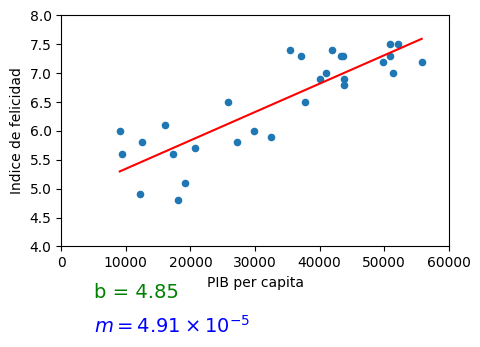

In [ ]:
df.plot(kind='scatter', x="PIB per capita", y='Indice de felicidad', figsize=(5,3))
plt.axis([0, 60000, 4, 8])

plt.plot(X, m*X + b, "r")
plt.text(5000, 3.1, "b = 4.85", fontsize=14, color="g")
plt.text(5000, 2.5, r"$m = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

In [ ]:
#vamos a usar nuestro algoritmo para predecir el nivel de satisfaccion de
#cualquier pais del que sepamos su PIB

chipre_gdp_per_capita = 22587
chipre_predecir_indice_felicidad = model.predict([[chipre_gdp_per_capita]])
chipre_predecir_indice_felicidad

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5.96242339]])

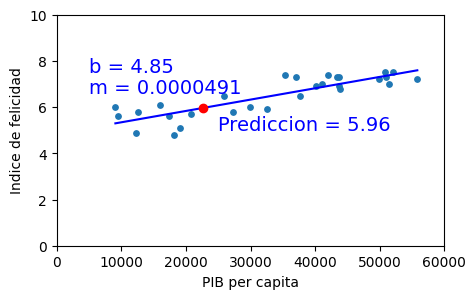

In [ ]:
df.plot(kind='scatter', x="PIB per capita", y='Indice de felicidad', figsize=(5,3), s=15)

plt.plot(X, m*X + b, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, "b = 4.85", fontsize=14, color="b")
plt.text(5000, 6.6, "m = 0.0000491", fontsize=14, color="b")

plt.plot(chipre_gdp_per_capita, chipre_predecir_indice_felicidad, 'ro')
plt.text(25000, 5.0, "Prediccion = 5.96", fontsize=14, color="b")

plt.show()

# [cyprus_pib_per_capita, cyprus_pib_per_capita]: Esta lista define las coordenadas
# x de dos puntos en el gr√°fico. Curiosamente, ambos puntos tienen el mismo valor
# cyprus_pib_per_capita, lo que significa que en t√©rminos de coordenadas x, ambos
# puntos est√°n en la misma posici√≥n. Esto sugiere que cyprus_pib_per_capita es un
# valor num√©rico, posiblemente el PIB per c√°pita de Chipre.

# [0, cyprus_predicted_indice_felicidad]: Esta lista define las coordenadas y de l
# os dos puntos. El primer punto est√° en 0 y el segundo en cyprus_predicted_indice_felicidad.
# Esto indica que se est√° trazando una l√≠nea vertical desde 0 hasta
# cyprus_predicted_indice_felicidad en el eje y, en la posici√≥n x definida por
# cyprus_pib_per_capita.

# 2.- MODELO REGRESION LINEAL MULTIVARIABLE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Advertising.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'Advertising.csv'

In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar la columna innecesaria
#df.drop(columns=['Unnamed: 0'], inplace=True)

# Definir las variables independientes (X) y la variable dependiente (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresi√≥n lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

#Obtener los coeficientes y el intercepto

#Un aumento de 1 unidad en la inversi√≥n en publicidad en TV se asocia con un
# aumento aproximado de 0.0447 unidades en las ventas.
# Un aumento de 1 unidad en la inversi√≥n en publicidad en radio se asocia con un
# aumento aproximado de 0.1891 unidades en las ventas.
# Un aumento de 1 unidad en la inversi√≥n en publicidad en peri√≥dicos se asocia con
# un aumento de de 0.0027 unidades en las ventas, aunque este coeficiente es muy
# cercano a cero, lo que indica que podr√≠a tener poco o ning√∫n efecto.
# El intercepto de 2.979 sugiere el nivel base de ventas cuando la inversi√≥n en
# todas las formas de publicidad es cero.

coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Nuevos valores para predicci√≥n
new_data = [[5.2, 50.5, 80.5]]

# Realizar la predicci√≥n con el modelo entrenado
# Dado que predicted_sales es un arreglo que contiene las predicciones del modelo,
# predicted_sales[0] simplemente accede al primer elemento de este arreglo, que es
# la predicci√≥n para la primera y √∫nica observaci√≥n(1 sola fila de datos: 5.2,
# 50.5 y 80.5)
# en new_data.

predicted_sales = model.predict(new_data)
predicted_sales[0]


In [ ]:
# Calcular m√©tricas para evaluar el desempe√±o del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

In [ ]:
# Aqu√≠ tienes un resumen estad√≠stico de la columna 'Sales' de los datos:

# Cantidad de datos (count): 200 observaciones.
# Media (mean): 14.02 unidades de venta.
# Desviaci√≥n est√°ndar (std): 5.22, lo que indica la variabilidad de las ventas.
# M√≠nimo (min): 1.6 unidades de venta.
# M√°ximo (max): 27.0 unidades de venta.
# Cuartiles:
# 25%: 10.38 unidades de venta.
# 50% (mediana): 12.9 unidades de venta.
# 75%: 17.4 unidades de venta.

In [ ]:
# Mean Squared Error (MSE) de 3.174:
# Dado que la desviaci√≥n est√°ndar de las ventas es aproximadamente 5.22, un MSE
# de 3.174 significa que el error cuadr√°tico medio del modelo es menor que la
# desviaci√≥n est√°ndar. Esto indica que las predicciones del modelo tienen un error
#  promedio bastante bajo en comparaci√≥n con la variabilidad natural de las ventas.
# R¬≤ de 0.899:(varia entre 0 y 1)
# Un R¬≤ de 0.899 es muy alto, indicando que el modelo puede explicar
# aproximadamente el 89.9% de la variaci√≥n en las ventas a partir de los gastos
# en publicidad en TV, radio y peri√≥dicos. Esto confirma que el modelo es efectivo
# en capturar la relaci√≥n entre las inversiones en publicidad y las ventas
# generadas.
# Conclusi√≥n:
# El modelo de regresi√≥n tiene un buen desempe√±o general. El bajo MSE en relaci√≥n
# a la desviaci√≥n est√°ndar y el alto R¬≤ sugieren que el modelo predice las ventas
# de manera efectiva y con precisi√≥n razonable, considerando la variabilidad de
# las ventas observadas. Esto implica que el modelo es una herramienta √∫til para
# predecir las ventas basadas en la inversi√≥n publicitaria. ‚Äã

In [ ]:
import matplotlib.pyplot as plt

# Configurar la gr√°fica
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['TV'], df['Sales'], s=df['Newspaper']*15, c=df['Radio'], cmap='viridis_r', alpha=0.6)

# A√±adir etiquetas y t√≠tulo
plt.xlabel('Gasto en Publicidad en TV')
plt.ylabel('Ventas')
plt.title('Gr√°fica de Burbujas de Gastos en Publicidad')

# A√±adir una barra de color para interpretar el gasto en Radio
plt.colorbar(scatter, label='Gasto en Publicidad en Radio')

# Mostrar la grilla
plt.grid()

# Mostrar la gr√°fica
plt.show()

# 3.- MODELO REGRESION POLINOMIAL

In [ ]:
# Ecuaci√≥n: La forma b√°sica de un modelo de regresi√≥n polinomial ser√≠a:

# y=ùõΩ0 + ùõΩ1ùë• + ùõΩ2x¬≤ ‚Ä¶...+ùõΩùëõùë•^ùëõ + ùúñ

# Aqu√≠, x es la variable independiente elevada a diferentes potencias (hasta
# n), y cada t√©rmino tiene su propio coeficiente que describe la contribuci√≥n de
# esa potencia de x a la variable dependiente y.

# Uso: Es especialmente √∫til en casos donde los datos muestran patrones no
# lineales. Al incrementar el grado del polinomio, el modelo puede capturar
# relaciones m√°s complejas, pero a costa de un mayor riesgo de sobreajuste.

import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Paso 1: Cargar el conjunto de datos
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Paso 2: Preparar los datos
# Seleccionamos algunas caracter√≠sticas para simplificar el modelo
X = df[['MedInc', 'HouseAge', 'AveRooms']]  # Ingreso medio, edad de la casa, promedio de cuartos
y = df['MedHouseVal']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Crear caracter√≠sticas polinomiales
# Este c√≥digo se utiliza t√≠picamente en el contexto del aprendizaje autom√°tico para
# transformar un conjunto de datos con caracter√≠sticas lineales a un formato que
# pueda modelar relaciones no lineales.
# Este c√≥digo prepara los datos tanto de entrenamiento como de prueba para un
# modelo de aprendizaje autom√°tico que intentar√° capturar tanto las relaciones
# lineales como las no lineales entre las caracter√≠sticas. Esto es particularmente
# √∫til para modelos que suponen que la relaci√≥n entre las caracter√≠sticas y la
# variable objetivo puede ser m√°s compleja que una simple relaci√≥n lineal.
# Te permite construir un modelo que puede capturar mucho mejor la complejidad
# de los datos, haci√©ndolo m√°s flexible y capaz de capturar patrones no lineales
# que de otro modo podr√≠an pasarse por alto. Degree es la potencia maxima de las
# variables en este caso X¬≤. Include_bias=False Evita que se a√±ada una
# caracter√≠stica de sesgo (una columna de unos).que normalmente se usa para
# modelar el t√©rmino independiente en un modelo lineal.
# el m√©todo fit_transform primero "aprende" qu√© caracter√≠sticas necesita crear
#a partir del conjunto de entrenamiento (X_train), y luego transforma X_train en
#este nuevo conjunto de caracter√≠sticas polinomiales. Esto prepara X_train_poly,
#que ahora contiene tanto las caracter√≠sticas originales como las derivadas
#polinomialmente.
# Usando el m√©todo transform, transformamos el conjunto de prueba (X_test) en el
# mismo conjunto de caracter√≠sticas polinomiales que el de entrenamiento.
# Importante: s√≥lo se utiliza transform y no fit_transform, porque queremos
# utilizar las mismas transformaciones y ajustes que aprendimos con el conjunto de
# entrenamiento.
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Paso 4: Entrenar el modelo de regresi√≥n lineal
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Paso 5: Evaluar el modelo
y_pred = model.predict(X_test_poly)
import numpy as np

# Supongamos que tienes nuevos datos que se ajustan a las mismas caracter√≠sticas:
nuevos_datos = np.array([[3.5, 15, 5], [2.0, 30, 3]])  # [Ingreso medio,
#Edad de la casa, Promedio de cuartos]

# Transformamos los nuevos datos al mismo formato polinomial usado en el entrenamiento
nuevos_datos_poly = poly_features.transform(nuevos_datos)

# Realizamos la predicci√≥n utilizando el modelo entrenado
predicciones = model.predict(nuevos_datos_poly)

# Imprimimos las predicciones
print("Predicciones:", predicciones)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Predicciones: [1.74758002 1.38695135]
Mean Squared Error: 0.6420081797325325
R^2 Score: 0.5100703746746547


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
#Agregamos una cuarta variable para ver si mejoran las metricas

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Cargar el conjunto de datos de viviendas de California
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['MedHouseVal'] = california_housing.target

# Seleccionar caracter√≠sticas
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']]  # Asumiendo que 'AveOccup' es correcto
y = data['MedHouseVal']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear caracter√≠sticas polinomiales
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Entrenar un modelo de regresi√≥n lineal
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.6243838746050159
R^2 Score: 0.523519843825252


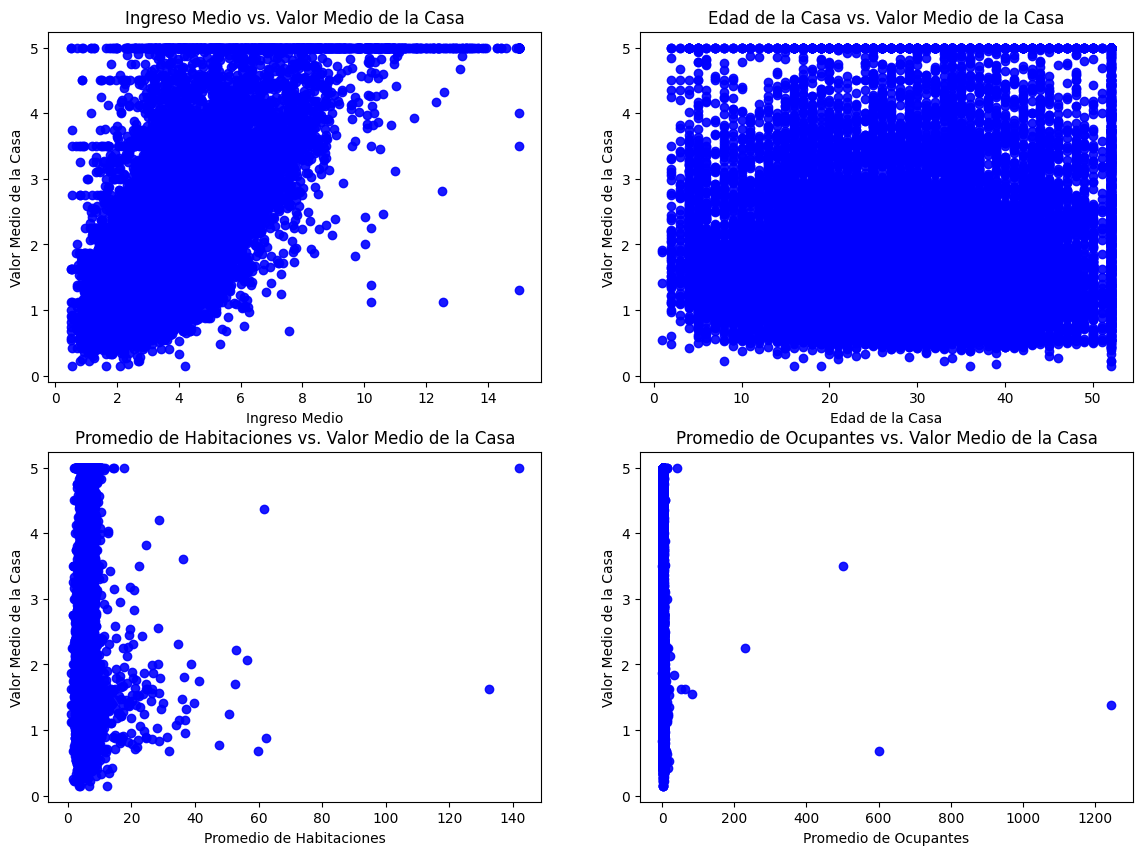

In [ ]:
import matplotlib.pyplot as plt

# Datos de ejemplo, aseg√∫rate de que estos datos est√©n correctamente definidos en tu contexto
X_train = data[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']]  # Variables independientes
y_train = data['MedHouseVal']  # Variable dependiente

# Configuraci√≥n de la figura principal
plt.figure(figsize=(14, 10))


# Gr√°fico de dispersi√≥n para Ingreso Medio vs. Valor Medio de la Casa
plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, posici√≥n 1
plt.scatter(X_train['MedInc'], y_train, alpha=0.9, color='blue')
plt.title('Ingreso Medio vs. Valor Medio de la Casa')
plt.xlabel('Ingreso Medio')
plt.ylabel('Valor Medio de la Casa')

# Gr√°fico de dispersi√≥n para Edad de la Casa vs. Valor Medio de la Casa
plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, posici√≥n 2
plt.scatter(X_train['HouseAge'], y_train, alpha=0.9, color='blue')
plt.title('Edad de la Casa vs. Valor Medio de la Casa')
plt.xlabel('Edad de la Casa')
plt.ylabel('Valor Medio de la Casa')

# Gr√°fico de dispersi√≥n para Promedio de Habitaciones vs. Valor Medio de la Casa
plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, posici√≥n 3
plt.scatter(X_train['AveRooms'], y_train, alpha=0.9, color='blue')
plt.title('Promedio de Habitaciones vs. Valor Medio de la Casa')
plt.xlabel('Promedio de Habitaciones')
plt.ylabel('Valor Medio de la Casa')

# Gr√°fico de dispersi√≥n para Promedio de Ocupantes vs. Valor Medio de la Casa
plt.subplot(2, 2, 4)  # 2 filas, 2 columnas, posici√≥n 4
plt.scatter(X_train['AveOccup'], y_train, alpha=0.9, color='blue')
plt.title('Promedio de Ocupantes vs. Valor Medio de la Casa')
plt.xlabel('Promedio de Ocupantes')
plt.ylabel('Valor Medio de la Casa')


plt.show()

#4.- MODELO DE CLASIFICACION. REGRESION LOGISTICA

La clasificaci√≥n es un tipo de problema en el que el objetivo es predecir una
categor√≠a o clase a partir de uno o m√°s valores de entrada. Un ejemplo com√∫n es el filtro de spam de un proveedor de correo electr√≥nico, que clasifica los correos electr√≥nicos como "spam" o "no spam" bas√°ndose en una serie de caracter√≠sticas del correo electr√≥nico. Algunos de los algoritmos m√°s comunes para los problemas de clasificaci√≥n incluyen la regresion logistica,  las m√°quinas de vectores de soporte (SVM), los √°rboles de decisi√≥n y las redes neuronales.

In [ ]:
# La regresi√≥n log√≠stica en scikit-learn se considera un modelo de clasificaci√≥n.
# Aunque el t√©rmino "regresi√≥n" est√° presente en su nombre, la regresi√≥n log√≠stica
# se utiliza principalmente para problemas de clasificaci√≥n binaria o multiclase.

# La regresi√≥n log√≠stica estima la probabilidad de que una instancia pertenezca a
# una clase espec√≠fica utilizando una funci√≥n log√≠stica o sigmoide.
# A partir de esta probabilidad estimada, se toma una decisi√≥n de clasificaci√≥n
# asignando la instancia a la clase con la probabilidad m√°s alta.

# En el caso del dataset Iris en scikit-learn, la regresi√≥n log√≠stica se puede
# utilizar para clasificar las flores en diferentes especies utilizando las
# caracter√≠sticas disponibles en el conjunto de datos.



In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#cargamos el dataset Iris
iris = load_iris()
X = iris.data    #las 4 caracteristicas
y = iris.target   #las 3 etiquetas diferentes

# El dataset Iris contiene mediciones de caracter√≠sticas de tres especies de
# flores: setosa, versicolor y virginica. Cada muestra del dataset tiene cuatro
# caracter√≠sticas: longitud y ancho del s√©palo, y longitud y ancho del p√©talo.




In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

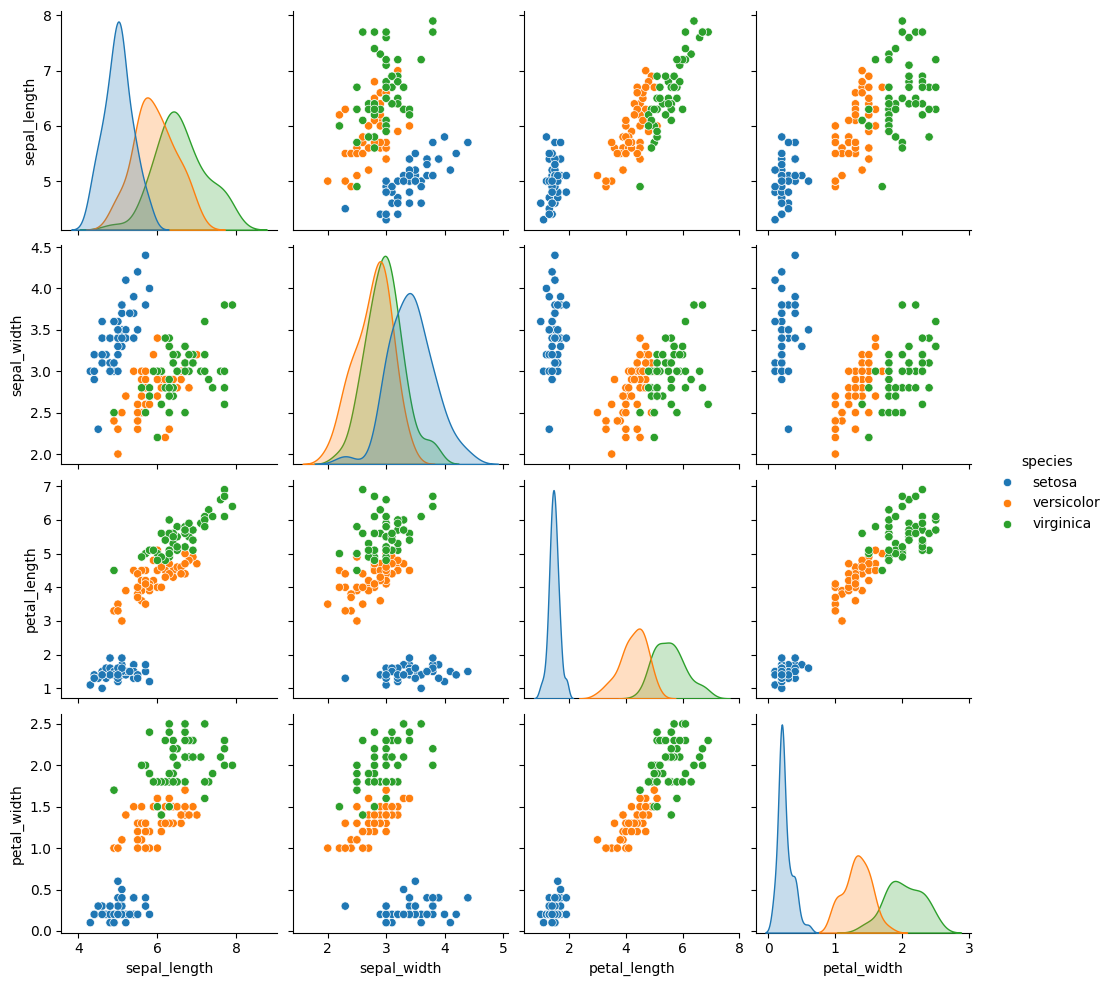

In [ ]:
#Matriz de dispersion
# Una matriz de dispersi√≥n de las caracter√≠sticas del conjunto de datos Iris
# puede ayudarte a entender las relaciones entre las diferentes caracter√≠sticas
# (longitud del s√©palo, ancho del s√©palo, longitud del p√©talo, ancho del p√©talo)
# y c√≥mo estas se distribuyen seg√∫n las clases (tipos de flores:setosa, virginica
# y versicolor). Esto es √∫til para ver c√≥mo las caracter√≠sticas se agrupan por especie.
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')
plt.show()

In [ ]:
# dividimos los datos en conjuntos de entrenamiento y prueba usando la funcion
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Creamos una instancia del modelo de regresion logistica y lo entrenamos usando
#la funcion fit().
#Crear una instancia de un modelo algor√≠tmico en el contexto del aprendizaje
#autom√°tico es similar a crear un objeto de una clase en Python.

model=LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#realizamos prediccion en el conjunto de prueba usando la funcion predict()

y_pred=model.predict(X_test)
#Nuevos datos de ejemplo
new_data = [[5.1, 3.5, 1.4, 0.2], [6.7, 3.0, 5.2, 2.3], [5.5, 2.4, 3.8, 1.1]]
new_predictions = model.predict(new_data)

print("Predicted classes for new data:", new_predictions)

Predicted classes for new data: [0 2 1]


La evaluaci√≥n de un modelo de machine learning es un paso esencial para entender
c√≥mo de bien est√° funcionando. Dependiendo de si tu modelo es de clasificaci√≥n,
regresi√≥n o alg√∫n otro tipo de modelo, hay diferentes m√©tricas que puedes usar.



*   ***Accuracy***: Es la proporci√≥n de predicciones correctas sobre
el total de predicciones. Es una m√©trica √∫til cuando las clases est√°n
bien balanceadas. Buena maetrica para problemas multiclase
*   ***Recall (Sensitivity o True Positive Rate)***: Es la proporci√≥n de verdaderos
positivos que se identificaron correctamente. Es √∫til en situaciones
donde los falsos negativos son m√°s preocupantes que los falsos
positivos. Mejor para problemas binarios
*   ***Precision***: Es la proporci√≥n de verdaderos positivos entre todas las
predicciones positivas. Es √∫til en situaciones donde los falsos
positivos son m√°s preocupantes que los falsos negativos. Mejor para problemas binarios
*   ***F1 Score***: Es la media arm√≥nica de Precision y Recall. Intenta equilibrar
ambas m√©tricas y es m√°s √∫til que la precisi√≥n cuando tienes una
distribuci√≥n de clases desequilibrada. Mejor para problemas binarios



Una matriz de confusi√≥n es una tabla que se utiliza para evaluar el rendimiento de un modelo de clasificaci√≥n en problemas de aprendizaje supervisado. Es especialmente √∫til cuando se trata de problemas de clasificaci√≥n binaria, aunque tambi√©n se puede extender a problemas de clasificaci√≥n multiclase.

La matriz de confusi√≥n muestra la cantidad de predicciones correctas e incorrectas realizadas por un modelo en cada clase. La estructura b√°sica de la matriz de confusi√≥n es la siguiente:

**Verdaderos Positivos (TP) ‚áí
Falsos Negativos (FN) ‚áí
Falsos Positivos (FP) ‚áí
Verdaderos Negativos (TN)**


*   ***Verdaderos Positivos (TP)***: Son las instancias que el modelo ha clasificado correctamente como positivas.
*   ***Falsos Negativos (FN)***: Son las instancias que el modelo ha clasificado incorrectamente como negativas cuando son positivas.
*   ***Falsos Positivos (FP)***: Son las instancias que el modelo ha clasificado incorrectamente como positivas cuando son negativas.
*   ***Verdaderos Negativos (TN)***: Son las instancias que el modelo ha clasificado correctamente como negativas.


In [ ]:
#evaluamos el rendimiento del modelo mediante alguna metrica como
#por ejemplo la precision (accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
# Creamos la matriz de confusi√≥n.

# Fila 1 (Clase 0):

# 10 se refiere a los casos en los que el modelo clasific√≥ correctamente las
# instancias de la clase 0 como clase 0 (verdaderos positivos).
# 0 se refiere a los casos en los que el modelo clasific√≥ incorrectamente las
# instancias de la clase 0 como alguna otra clase (falsos negativos).

# Fila 2 (Clase 1):

# 9 se refiere a los casos en los que el modelo clasific√≥ correctamente las
# instancias de la clase 1 como clase 1 (verdaderos positivos).
# 0 se refiere a los casos en los que el modelo clasific√≥ incorrectamente las
# instancias de la clase 1 como alguna otra clase (falsos negativos).

# Fila 3 (Clase 2):

# 11 se refiere a los casos en los que el modelo clasific√≥ correctamente las
# instancias de la clase 2 como clase 2 (verdaderos positivos).
# 0 se refiere a los casos en los que el modelo clasific√≥ incorrectamente las
# instancias de la clase 2 como alguna otra clase (falsos negativos).


matriz_confusion=confusion_matrix(y_test, y_pred)
print(matriz_confusion)

# Esta matriz de confusi√≥n sugiere que el modelo ha realizado clasificaciones
# perfectas para las tres clases, sin errores de clasificaci√≥n, ya que todos los
# valores fuera de la diagonal principal son ceros. Esto es un resultado ideal en
# t√©rminos de clasificaci√≥n.

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# 5.- MODELO DE CLASIFICACION. KNN



In [ ]:
#KNN, que significa k-nearest neighbors (k vecinos m√°s cercanos), es un m√©todo
# de aprendizaje autom√°tico que se utiliza para clasificar datos o predecir
# resultados bas√°ndose en la similitud entre los ejemplos. Funciona asignando un
# nuevo punto de datos a la categor√≠a m√°s com√∫n entre sus k vecinos m√°s cercanos
# en un espacio de caracter√≠sticas. KNN es simple y efectivo, especialmente en
# tareas donde las relaciones entre los datos son intr√≠nsecamente no lineales.
# No requiere un modelo expl√≠cito, sino que toma decisiones basadas en la mayor√≠a
# de votos de los vecinos m√°s cercanos durante la fase de predicci√≥n.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Normalizar los datos
# KNN clasifica los puntos bas√°ndose en la distancia m√°s cercana entre ellos. Si
# una caracter√≠stica tiene un rango mucho m√°s amplio que otra, entonces tendr√° un
# mayor impacto en la distancia, lo cual puede sesgar el modelo. La estandarizaci√≥n
# de las caracter√≠sticas para que tengan una media de 0 y una desviaci√≥n est√°ndar
# de 1 asegura que todas las caracter√≠sticas contribuyan equitativamente a la
# distancia.
# Algunas de las variables (columnas) tienen escalas muy diferentes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Crear y entrenar el modelo KNN
# n_neighbors es un hiperpar√°metro que es un parametro cuyo valor se establece antes del
# entrenamiento del modelo y que influye en el comportamiento y el rendimiento del
# modelo. Los hiperpar√°metros no se derivan del proceso de entrenamiento, sino que
# se ajustan manualmente. Podemos probar con otros numeros no solo el 5
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predecir los resultados para 4 conjuntos de prueba, la data tiene 30
# caracteristicas

# Cero es tumor maligno y 1 es tumor benigno
# new_data_escalada=[
#     [-0.5, 0.3, -0.4, -0.6, 0.7, -1.0, 0.3, -0.2, 0.5, -1.2,
#      1.0, -0.3, -0.5, -0.4, 0.9, -0.7, 0.5, -0.1, 0.2, -0.8,
#      -0.3, 0.4, -0.6, -0.5, 0.6, -0.9, 0.3, -0.4, 0.7, -1.1],
#     [-0.1, -1.0, 0.2, -0.3, -0.8, 0.5, -0.2, 0.1, -0.6, 0.3,
#      -0.2, 0.6, 0.1, 0.2, -0.5, 0.4, -0.6, 0.7, -0.1, 0.5,
#      0.2, -0.7, 0.3, -0.2, 0.4, -0.6, 0.2, 0.3, -0.7, 0.2],
#     [0.8, 0.2, 0.5, 0.6, 0.1, 0.3, 0.7, -0.5, 0.2, -0.1,
#      0.5, -0.4, 0.3, 0.7, -0.2, 0.1, -0.3, 0.6, -0.5, 0.4,
#      0.6, 0.3, 0.7, 0.5, -0.6, 0.2, 0.5, -0.4, 0.3, -0.2],
#     [0.2, -0.5, 0.1, 0.3, -0.7, 0.6, -0.1, 0.4, -0.3, 0.5,
#      -0.6, 0.2, 0.5, -0.4, 0.3, -0.2, 0.7, -0.1, 0.6, -0.5,
#      0.4, -0.6, 0.2, 0.1, -0.3, 0.7, -0.5, 0.3, -0.7, 0.6]
# ]
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:

# Aseg√∫rate de que y_test tenga 4 etiquetas, aqu√≠ est√° un ejemplo si tu y_test es m√°s grande:
#y_test_adjusted = y_test[:4]  # Ajusta seg√∫n sea necesario

# Calcular la precisi√≥n
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9590643274853801

In [ ]:
# Crear una matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[ 59,   4],
       [  3, 105]])

Precisi√≥n del modelo: 0.9590643274853801


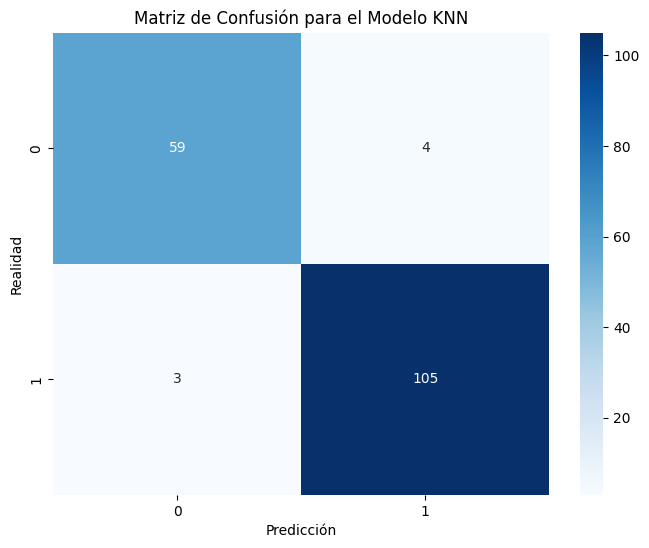

In [ ]:
#Mostrar la accuracy y la matriz de confusi√≥n
print("Precisi√≥n del modelo:", accuracy)

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicci√≥n')
plt.ylabel('Realidad')
plt.title('Matriz de Confusi√≥n para el Modelo KNN')
plt.show()

6.- MODELOS DE CLASIFICACION. DECISION TREE

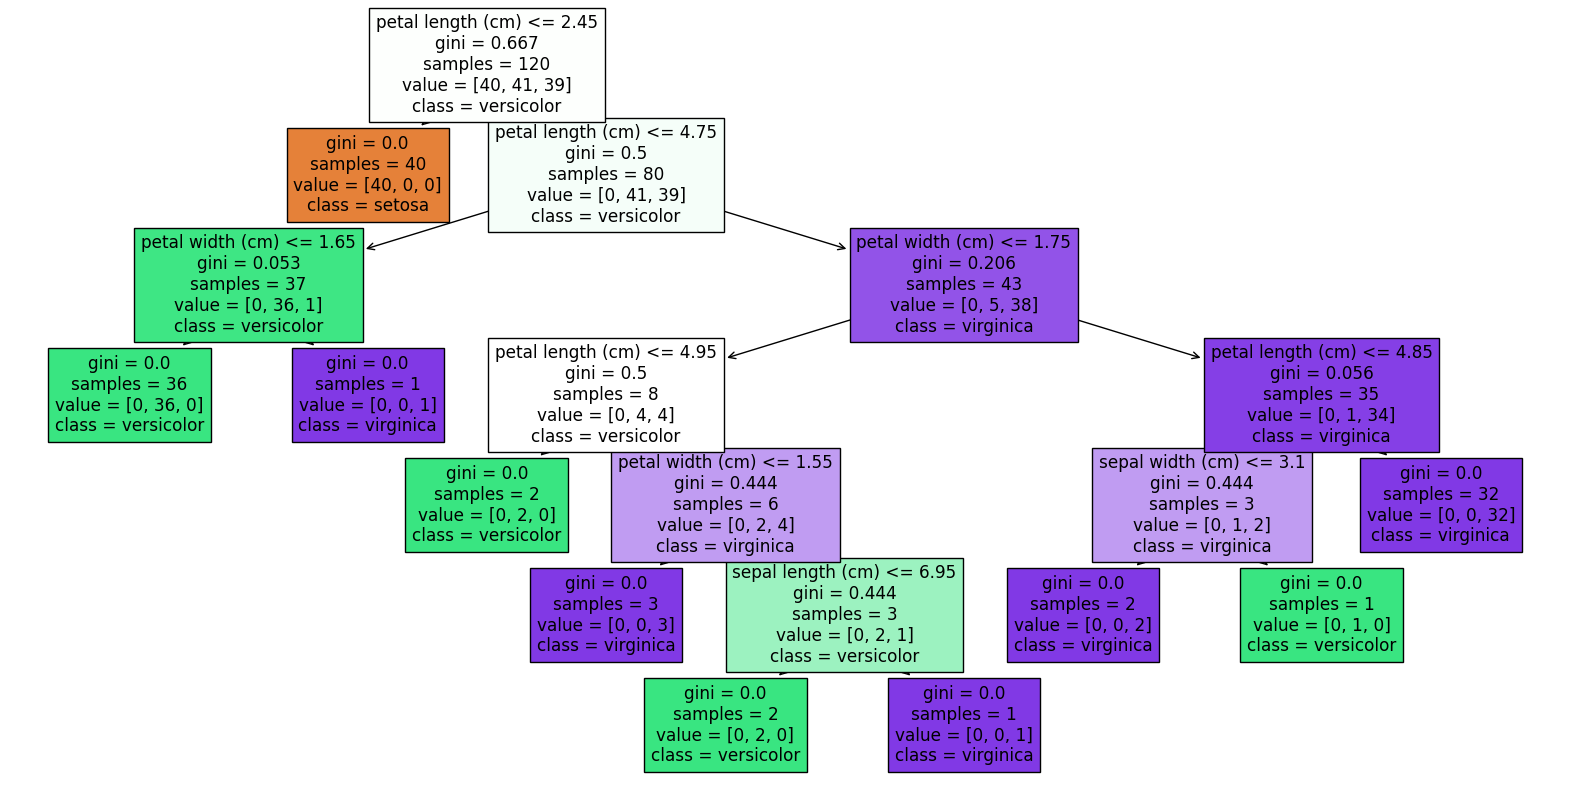

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el conjunto de datos
iris = load_iris()
X = iris.data
y = iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de √°rbol de decisi√≥n
model = DecisionTreeClassifier(random_state=123)
model.fit(X_train, y_train)

# Crear la gr√°fica del √°rbol de decisi√≥n usando Matplotlib, filled=True le da
# colores a los rectangulos,
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


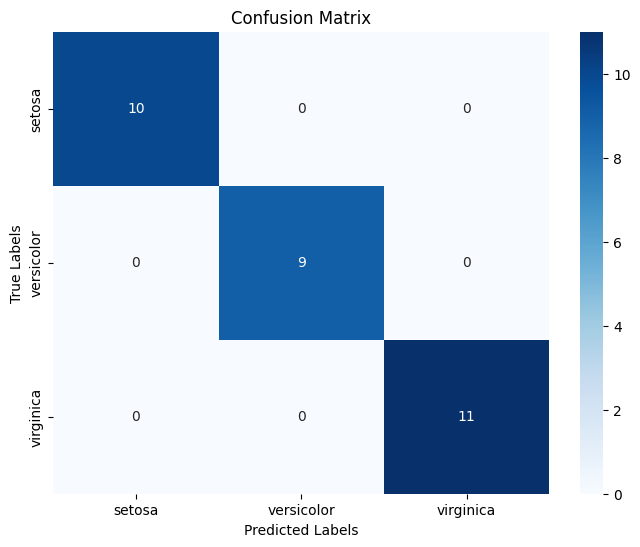

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

La clase predicha para la nueva muestra es: setosa


In [ ]:
# Realizar la predicci√≥n usando el modelo entrenado para el conjunto de prueba
# Donde X_test representa los datos de prueba. Estos son un conjunto de datos
#  Estos son un conjunto de datos separados del conjunto de entrenamiento
#  (X_train) y no se han utilizado durante el entrenamiento del modelo. La raz√≥n
#  de usar X_test es validar la capacidad del modelo para trabajar con nuevos datos,
#  es decir, para verificar c√≥mo el modelo se desempe√±a en situaciones "reales".
y_pred = model.predict(X_test)


# Calcular y mostrar la precisi√≥n
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calcular y mostrar la matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualizar la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular y mostrar el informe de clasificaci√≥n
cr = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(cr)

# Realizar la predicci√≥n usando el modelo entrenado para una muestra nueva
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])
y_pred_new_sample = model.predict(new_sample)
predicted_class_name = iris.target_names[y_pred_new_sample][0]
print(f"La clase predicha para la nueva muestra es: {predicted_class_name}")

In [ ]:
# El "Classification Report" es una representaci√≥n visual de varias m√©tricas clave
# para evaluar el rendimiento de un modelo de clasificaci√≥n. El reporte proporciona
# cuatro tipos de m√©tricas: precisi√≥n, recall, f1-score y support para cada clase
# en el conjunto de datos. Tambi√©n incluye tres m√©tricas adicionales para evaluar
# el rendimiento general: la precisi√≥n general (accuracy), el promedio macro y el
# promedio ponderado. Aqu√≠ te explico cada uno de estos datos para el ejemplo dado:

# 1. Precision
# Definici√≥n: La precisi√≥n indica la capacidad del clasificador de no etiquetar
# como positivo un ejemplo que es negativo. En otras palabras, es la proporci√≥n
# de los verdaderos positivos frente a todos los positivos predichos (verdaderos
# positivos + falsos positivos).
# Valores del ejemplo:
# Setosa: 1.00
# Versicolor: 1.00
# Virginica: 1.00
# Esto significa que para cada clase, el 100% de las instancias clasificadas como
# pertenecientes a una clase efectivamente pertenecen a esa clase.

# 2. Recall
# Definici√≥n: El recall es la capacidad del clasificador para encontrar todas las
# instancias positivas. Por ejemplo, el recall de una clase se calcula como la
# proporci√≥n de verdaderos positivos dividida por la suma de los verdaderos
# positivos y los falsos negativos (las instancias positivas que el modelo no detect√≥).
# Valores del ejemplo:
# Setosa: 1.00
# Versicolor: 1.00
# Virginica: 1.00
# Esto indica que el modelo identific√≥ correctamente el 100% de las muestras
# reales de cada clase.

# 3. F1-Score
# Definici√≥n: El F1-score es una medida que combina precisi√≥n y recall en un solo
# n√∫mero. Es la media arm√≥nica de la precisi√≥n y el recall. Un F1-score alcanza
# su mejor valor en 1 (precisi√≥n y recall perfectos) y el peor en 0.
# Valores del ejemplo:
# Setosa: 1.00
# Versicolor: 1.00
# Virginica: 1.00
# Esto muestra que el modelo es perfecto en t√©rminos de precisi√≥n y recall para
# todas las clases.

# 4. Support
# Definici√≥n: El support es el n√∫mero de ocurrencias reales de la clase en el
# conjunto de datos especificado.
# Valores del ejemplo:
# Setosa: 10
# Versicolor: 9
# Virginica: 11
# Esto indica cu√°ntas instancias de cada clase est√°n presentes en el conjunto de
# datos que se est√° evaluando.

# M√©tricas Adicionales:

# Accuracy:
# Valor: 1.00
# Muestra la proporci√≥n de todas las predicciones correctas (todas las clases)
# sobre todas las predicciones hechas.

# Macro Average:
# Valor: 1.00
# Calcula la media de las m√©tricas para cada clase sin tener en cuenta la
# proporci√≥n de cada clase en el conjunto de datos (no ponderado).

# Weighted Average:
# Valor: 1.00
# Calcula la media de las m√©tricas para cada clase ponderando cada una por su
# support (n√∫mero de instancias reales).

# En resumen, este reporte sugiere que el modelo ha logrado un rendimiento
# perfecto en la clasificaci√≥n de las muestras del conjunto de datos,
# identificando correctamente y sin errores todas las categor√≠as de las flores de
# iris evaluadas.

# 7.- MODELO DE CLASIFICACION: RANDOM FOREST

In [ ]:
# El algoritmo de Random Forest es un m√©todo de aprendizaje autom√°tico que opera
# construyendo m√∫ltiples √°rboles de decisi√≥n durante el entrenamiento y generando
# la salida (clasificaci√≥n o regresi√≥n) basada en la moda (el valor que aparece
# con m√°s frecuencia) o el promedio de las predicciones de todos los √°rboles. Este
# enfoque se conoce como ensamblaje, ya que combina las predicciones de varios
# modelos b√°sicos para mejorar la robustez y la precisi√≥n general del modelo.

In [ ]:
# Importando los paquetes necesarios.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Importamos SGDClassifier de sklearn.linear_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
# Mejor para que no falle en el google colab!

In [ ]:
!wget -O winequality-red.csv https://raw.githubusercontent.com/CharlieScot/Intelligencia-Artificial/main/MODULO_4/winequality-red.csv?token=GHSAT0AAAAAACK7WEBRR7DZWHDPT36RAU7GZLIPLCQ

--2024-05-01 18:37:33--  https://raw.githubusercontent.com/CharlieScot/Intelligencia-Artificial/main/MODULO_4/winequality-red.csv?token=GHSAT0AAAAAACK7WEBRR7DZWHDPT36RAU7GZLIPLCQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‚Äòwinequality-red.csv‚Äô

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s    in 0.01s   

2024-05-01 18:37:33 (8.64 MB/s) - ‚Äòwinequality-red.csv‚Äô saved [100951/100951]



In [ ]:
df=pd.read_csv('winequality-red.csv', sep=',')

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Preprocesamiento de datos.
# Los vinos con una calificaci√≥n de calidad entre 2 y 6.5 (incluyendo 6.5) se
# considerar√°n "malos", mientras que los vinos con una calificaci√≥n entre 6.5
#(sin incluir) y 8 se considerar√°n "buenos"

bins= (2, 6.5, 8)
group_names= ['bad', 'good']
df['quality']=pd.cut(wine['quality'], bins=bins, labels=group_names)
# La funci√≥n cut() se aplica a la columna quality del DataFrame. Los argumentos
# de la funci√≥n son:
# wine['quality']: La columna que se va a procesar.
# bins=bins: Los intervalos que se usar√°n para dividir los datos de calidad.
# labels=group_names: Las etiquetas que se asignar√°n a los datos en cada bin
# correspondiente.

df['quality'].unique()
# Este comando se utiliza para verificar los valores √∫nicos que ahora existen en
# la columna quality del DataFrame df. Ayuda a confirmar que la transformaci√≥n se
# ha realizado correctamente y que s√≥lo existen las categor√≠as "bad" y "good".

['bad', 'good']
Categories (2, object): ['bad' < 'good']

A continuaci√≥n, se utiliza `LabelEncoder() que es una clase en la biblioteca scikit-learn de Python que se utiliza para convertir etiquetas de clases categ√≥ricas en n√∫meros.

In [ ]:
label_quality = LabelEncoder()

En el siguiente snippet, asignamos etiquetas num√©ricas (0, 1) a nuestra variable "calidad" (quality). El m√©todo `fit_transform()` de la clase `LabelEncoder` ajusta el codificador a las categor√≠as y luego transforma las categor√≠as en n√∫meros. Como solo tenemos dos grupos (*bad y good*), se asignan los valores `0` y `1`.

In [ ]:
df['quality'] = label_quality.fit_transform(df['quality'])

# Malos se convierten en O y buenos en 1

In [ ]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        0  
4      9.4        0  
5      9.4        0  
6      9.4        0  
7     10.0        1  
8      9.5        1  
9     10.5        0

In [ ]:
# Contamos los diferentes valores que hay en cada categoria de la
# variable 'quality'.

df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

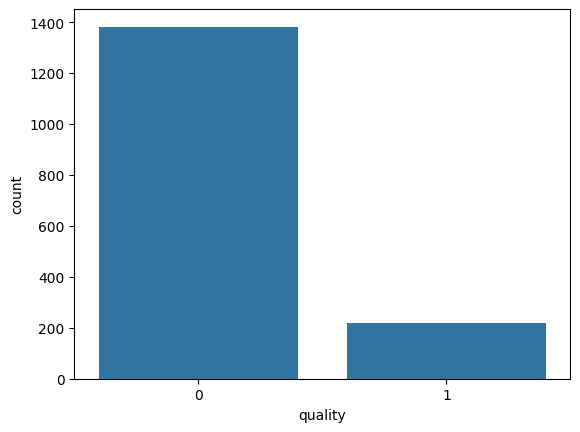

In [ ]:
sns.countplot(df, x=df['quality'])

In [ ]:
# Ahora separamos el conjunto de datos como variable de respuesta y variables de
# caracter√≠sticas.

X = df.drop('quality', axis = 1)
y = df['quality']

In [ ]:
# Entrenar y probar la divisi√≥n de datos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Aplicamos el escalado standard para obtener los datos optimizados.
# La mayoria de los modelos necesitan scaling, los valores de nuestra base de
# datos son muy grandes comparados con otros y eso puede hacer que el modelo
# se concentre demasiado en los valores grandes.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
#ahora los valores estan menos dispersos y oscilan entre -2 y 4 mas o menos.

X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

Random Forest (Bosque Aleatorio) es un algoritmo de aprendizaje supervisado que se utiliza tanto para tareas de clasificaci√≥n como para regresi√≥n. Pertenece a la categor√≠a de m√©todos de conjunto (ensemble methods), que combinan varios modelos para mejorar el rendimiento y la generalizaci√≥n del modelo.

Aqu√≠ hay algunas caracter√≠sticas clave del algoritmo Random Forest:

1.  **Construcci√≥n de √Årboles de Decisi√≥n**: Cada √°rbol de decisi√≥n en el bosque se construye utilizando una muestra aleatoria del conjunto de datos de entrenamiento. Adem√°s, en cada paso de la construcci√≥n del √°rbol, se selecciona aleatoriamente un subconjunto de caracter√≠sticas para elegir la mejor divisi√≥n. Esto ayuda a decorrelacionar los √°rboles y mejorar la generalizaci√≥n del modelo.

2.   **Votaci√≥n o Promedio**: En el caso de clasificaci√≥n, cada √°rbol en el bosque emite una predicci√≥n de clase y la clase final se determina por votaci√≥n. En el caso de regresi√≥n, las predicciones de los √°rboles se promedian para obtener la predicci√≥n final.

3.   **Manejo de Overfitting**: Al construir m√∫ltiples √°rboles y combinar sus resultados, Random Forest tiende a ser m√°s robusto y menos propenso al sobreajuste (overfitting) en comparaci√≥n con un solo √°rbol de decisi√≥n.

4.   **Importancia de las Caracter√≠sticas**: Random Forest proporciona una medida de la importancia de cada caracter√≠stica en el proceso de toma de decisiones. Esto puede ser √∫til para la selecci√≥n de caracter√≠sticas y la comprensi√≥n del modelo.

5.    **Versatilidad**: Random Forest es vers√°til y se puede aplicar a una variedad de problemas, incluyendo clasificaci√≥n y regresi√≥n. Adem√°s, es menos propenso a sobreajuste que un √°rbol de decisi√≥n √∫nico.

Para utilizar Random Forest en scikit-learn, puedes usar la clase `RandomForestClassifier` para problemas de clasificaci√≥n o `RandomForestRegressor` para problemas de regresi√≥n. Estas implementaciones permiten ajustar el n√∫mero de √°rboles en el bosque, as√≠ como otros par√°metros importantes.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# El par√°metro n_estimators en el contexto de los algoritmos Random Forest
# indica el n√∫mero de √°rboles que se deben construir en el bosque. Cada √°rbol
# en el bosque se construye utilizando una muestra aleatoria del conjunto de
# datos de entrenamiento, y el par√°metro n_estimators controla cu√°ntos de estos
# √°rboles se construir√°n.

model = RandomForestClassifier(n_estimators=200)


# Se utiliza la funci√≥n cross_val_score() para realizar la validaci√≥n cruzada
# k-fold con k=5. Esta funci√≥n toma el clasificador, las caracter√≠sticas (X),
# las etiquetas (y), y el n√∫mero de folds (cv) como argumentos.
# Devuelve una matriz de puntuaciones, donde cada elemento es la puntuaci√≥n del
# modelo en un fold espec√≠fico.

scores = cross_val_score(model, X, y, cv=200)

In [ ]:
print("Precisi√≥n en cada fold:", scores)
print("Precisi√≥n media:", scores.mean())

Precisi√≥n en cada fold: [0.875 0.875 0.875 0.875 0.875 0.875 1.    0.875 1.    1.    0.875 0.875
 1.    1.    0.875 0.875 1.    1.    1.    0.875 1.    1.    1.    1.
 1.    0.875 0.875 0.875 0.875 0.875 1.    0.875 1.    1.    1.    0.875
 1.    0.875 1.    0.875 0.875 1.    0.875 1.    0.875 0.875 0.875 0.75
 0.75  0.875 0.875 1.    0.75  1.    1.    0.875 1.    1.    1.    0.875
 0.875 0.875 1.    1.    1.    1.    0.875 0.875 1.    0.5   0.875 0.875
 0.875 1.    0.875 1.    0.875 0.875 0.875 0.875 1.    1.    1.    0.875
 1.    1.    0.875 0.875 1.    1.    0.875 1.    0.875 0.875 0.875 0.875
 1.    1.    0.875 1.    1.    1.    1.    1.    0.875 1.    0.875 1.
 1.    1.    0.875 0.875 0.75  1.    0.75  0.625 1.    0.875 1.    1.
 0.75  0.875 1.    0.875 0.875 0.75  0.875 0.875 0.875 0.875 1.    0.5
 0.875 0.875 1.    1.    1.    1.    0.875 0.875 1.    0.875 1.    0.875
 0.875 0.875 0.75  0.75  0.75  1.    1.    0.875 1.    1.    0.75  1.
 1.    1.    0.75  1.    1.    0.875 1.  

In [ ]:
# Entrenamos el modelo con el m√©todo fit().

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
X_test[:10]

array([[-0.33399129,  0.24258119, -0.96313679,  0.02140418,  0.83730066,
        -0.16962178,  0.00884052,  0.23074469, -0.44256111,  0.0634928 ,
        -0.75508835],
       [-0.27864317, -0.09492307, -0.49458376, -0.6712254 , -0.04244065,
         0.46521996,  1.72151211, -0.31812766,  0.51996419, -1.15964614,
        -0.84471308],
       [ 1.32645219,  0.86133899, -0.23427652,  0.17532186,  0.64485725,
         0.10245325, -0.35816054,  1.87736173, -0.1858877 ,  2.23796204,
        -0.48621416],
       [ 0.10879364, -0.31992591,  0.23427652, -0.17099293, -0.15240831,
         1.46282842,  0.37584158,  0.67982206,  0.13495407, -0.75193316,
        -0.57583889],
       [-0.88747245, -0.31992591, -0.13015362, -0.59426656, -0.17990022,
         0.19314493, -0.35816054, -0.91689749,  0.51996419, -0.34422018,
         0.14115895],
       [-0.61073187, -0.60117946,  0.18221507, -0.28643119, -0.01494873,
         1.73490345,  0.80400947,  0.1808472 ,  0.84080596, -0.88783749,
        -0.934

La funci√≥n `classification_report()` de scikit-learn proporciona un informe detallado de diversas m√©tricas de evaluaci√≥n del rendimiento de un modelo de clasificaci√≥n. Este informe incluye m√©tricas como `precision`, `recall`, `F1-score` y `support` para cada clase del problema de clasificaci√≥n.

Os doy una explicaci√≥n simple de las m√©tricas que se incluyen en el `classification_report`:

`Precision` (Precisi√≥n): Es la proporci√≥n de instancias positivas correctamente clasificadas respecto al total de instancias clasificadas como positivas. Mide la exactitud de las predicciones positivas. Valores entre `0` (impreciso) y `1`(Precisi√≥n) .

`Recall` (Sensibilidad o Tasa de Verdaderos Positivos): Es la proporci√≥n de instancias positivas correctamente clasificadas respecto al total de instancias que son realmente positivas. Mide la capacidad del modelo para capturar todas las instancias positivas. Valores entre `0` (Baja sensibilidad) y `1` (Alta sensibilidad).

`F1-score`: Es la media arm√≥nica ponderada de precisi√≥n y recall. Proporciona un equilibrio entre ambas m√©tricas y es √∫til cuando hay un desequilibrio entre las clases. Valores entre `0` (Desequilibrio) y `1` (Equilibrio).

`Support` (Soporte): Es el n√∫mero real de ocurrencias de las clases en el conjunto de datos de prueba.

In [ ]:
# Veamos el desempe√±o de nuestro modelo.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.62      0.38      0.47        47

    accuracy                           0.88       320
   macro avg       0.76      0.67      0.70       320
weighted avg       0.86      0.88      0.86       320



In [ ]:
# Matriz de confusi√≥n para la clasificaci√≥n aleatoria de bosques.

# Vemos que el modelo es bueno prediciendo vino malo (263,10) pero el modelo es
# malo prediciendo vino bueno (32, 15).

print(confusion_matrix(y_test, y_pred))

[[262  11]
 [ 29  18]]


In [ ]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, y_pred)

cm

0.875

In [ ]:
wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        2  
1      9.8        2  
2      9.8        2  
3      9.8        3  
4      9.4        2  
5      9.4        2  
6      9.4        2  
7     10.0        4  
8      9.5        4  
9     10.5        2

In [ ]:
# Probando un ejemplo.

Xnew = [[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]]
ynew = model.predict(Xnew)

In [ ]:
print('La calidad del vino con los par√°metros dados es:', ynew)

La calidad del vino con los par√°metros dados es: [0]


# 8.- MODELO DE CLASIFICACION. SUPPORT VECTOR MACHINE (SVM)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Cargar y preparar los datos
# Cargar Datos: load_digits() carga el conjunto de datos de d√≠gitos, que incluye
# im√°genes de d√≠gitos escritos a mano (cada imagen es una matriz de 8x8 p√≠xeles,
# que se aplana a un vector de 64 caracter√≠sticas).
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler() se usa para normalizar los datos de entrenamiento y prueba,
# lo que es un paso crucial en muchos algoritmos de aprendizaje autom√°tico para
# ayudar al modelo a converger m√°s r√°pido.

# Ajuste y Transformaci√≥n: fit_transform() ajusta el escalador a los datos de
# entrenamiento y los transforma. transform() se usa luego para transformar los
# datos de prueba usando el mismo escalador (sin ajustarlo nuevamente),
# garantizando que ambos conjuntos de datos sean tratados de manera equivalente.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo SVM
# Instancia de SVC: SVC(kernel='linear') crea una instancia del clasificador SVM
# con un kernel lineal. Esto significa que el modelo intentar√° encontrar un
# hiperplano lineal que separe las clases.
#El kernel es una funci√≥n que transforma los datos para que puedan ser separados
#de manera m√°s efectiva por un hiperplano en un espacio de mayor dimensi√≥n.
# el t√©rmino "kernel" se refiere a una funci√≥n que transforma el espacio de
# caracter√≠sticas de los datos de entrada para facilitar la separaci√≥n lineal de
# las clases, incluso si los datos no son linealmente separables en su espacio
# original.
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
X_test_scaled

array([[ 0.        , -0.34169755, -1.08739895, ...,  1.22242526,
         0.70096084, -0.19710003],
       [ 0.        , -0.34169755,  1.20074205, ..., -0.98396375,
        -0.50623083, -0.19710003],
       [ 0.        , -0.34169755,  0.57670359, ...,  0.20409187,
        -0.50623083, -0.19710003],
       ...,
       [ 0.        , -0.34169755,  0.36869078, ...,  0.54353633,
        -0.50623083, -0.19710003],
       [ 0.        , -0.34169755,  0.36869078, ...,  1.56186972,
         0.45952251, -0.19710003],
       [ 0.        , -0.34169755,  1.8247805 , ..., -0.30507483,
        -0.50623083, -0.19710003]])

In [ ]:
x_test_scaled=[-0.0584, 0.4491, -1.992, -0.644,
               0.7313, 0.947, 1.0464, -1.1902,
               1.7151, 0.2598, 0.3966, -0.8714,
               1.0956, 1.6113, 0.6357, -0.0337,
               -1.0587, 0.5045, -0.5198, -0.7775,
               -1.8697, 1.3559, 0.991, 0.6798,
               0.4102, 0.7324, -0.001, 0.6614,
               -0.4659, -0.6344, 1.0275, -0.4834,
               -0.4644, -0.6341, -0.4546, 0.5933,
               -0.9422, -0.7072, -0.8759, 0.7544,
               0.6505, 0.663, -0.2701, -0.6336,
               0.0277, 1.8893, -0.7584, 2.1615,
               0.019, 0.9062, -0.1561, -0.896,
               1.0321, 0.0602, 0.1037, -1.1958,
               -0.5032, -0.2454, -0.5485, -0.5074,
               0.1783, -0.8583, -0.8265, -0.1328]

y_pred = model.predict(X_test_scaled)
y_pred

# Este array tiene 360 elementos

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 3, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 5, 1, 5,
       5, 1, 0, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

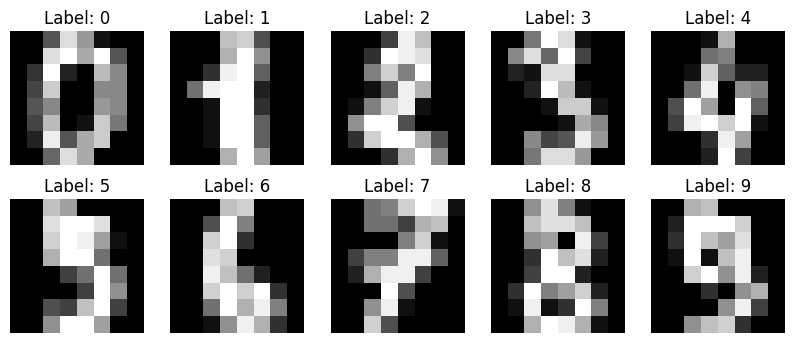

In [ ]:
# Configurar el tama√±o de la figura
plt.figure(figsize=(10, 4))

# Seleccionar cu√°ntas im√°genes mostrar
num_images = 10

for i in range(num_images):
    # Subplot para cada imagen
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.axis('off')  # Desactivar los ejes para mejor claridad
    plt.title(f'Label: {digits.target[i]}')

# Mostrar las im√°genes
plt.show()

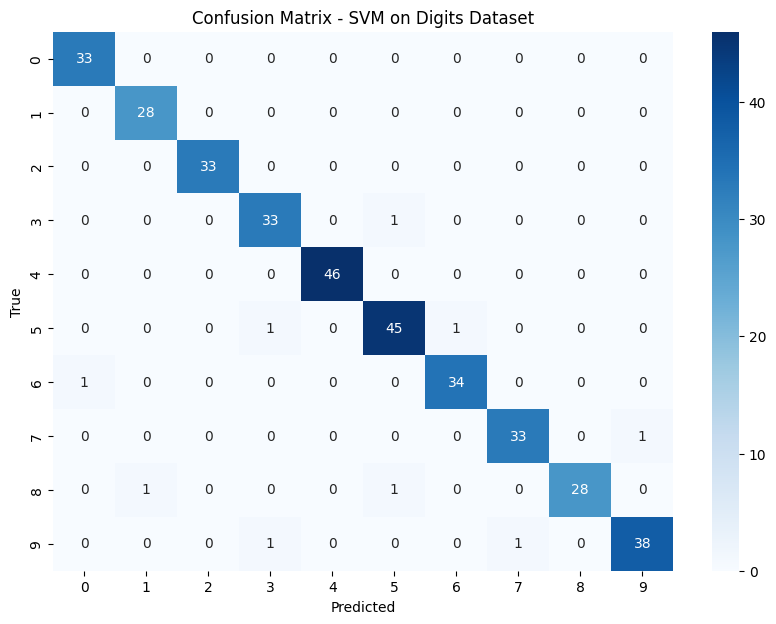

In [ ]:
# Generar la matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)


# Visualizar la matriz de confusi√≥n como un mapa de calor
# Cuando se establece annot=True, Seaborn a√±ade anotaciones a cada celda de la
# matriz de calor; en otras palabras, los valores num√©ricos son escritos
# directamente en las celdas correspondientes de la visualizaci√≥n.
# La suma de los numeros en todas las celdas da 360
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM on Digits Dataset')
plt.show()

# 9.- REDUCCION DE DIMENSIONALIDAD. PCA   10.- MODELO DE CLASIFICACION. NAIVE BAYES


In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Cargar el conjunto de datos de diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convertir en DataFrame para una mejor visualizaci√≥n
df = pd.DataFrame(X, columns=diabetes.feature_names)

# EDA (EXPLORATORY DATA ANALYSIS)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Mostrar una descripci√≥n estad√≠stica del DataFrame
print(df.describe())
print(df.info())


# Mostrar las dimensiones del DataFrame
print("Dimensiones del DataFrame:", df.shape)

# Informaci√≥n sobre el vector objetivo
print("Informaci√≥n sobre el vector objetivo:")
print(f"Media de la progresi√≥n de la enfermedad: {y.mean()}")
print(f"Desviaci√≥n est√°ndar de la progresi√≥n de la enfermedad: {y.std()}")
print(f"M√≠nimo de la progresi√≥n de la enfermedad: {y.min()}")
print(f"M√°ximo de la progresi√≥n de la enfermedad: {y.max()}")

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164

In [ ]:
# age: edad
# sex: genero
# bmi: Body Mass Index
# bp: Blood Pressure
# s1: Podr√≠a ser LDL, colesterol "malo", que es una medida com√∫n en estudios relacionados con el coraz√≥n y el metabolismo.
# s2: A menudo se refiere al HDL, colesterol "bueno".
# s3: Com√∫nmente se relaciona con los triglic√©ridos, otro tipo de l√≠pido en la sangre.
# s4: Podr√≠a indicar la medida de una hormona o enzima espec√≠fica, como la insulina en suero.
# s5: Esta podr√≠a ser una medida de la glucemia, como la hemoglobina A1c, que refleja el nivel promedio de az√∫car en sangre durante los √∫ltimos tres meses.
# s6: Puede ser la glucosa en suero despu√©s de una prueba de tolerancia a la glucosa.

In [ ]:
# Cargar Dataset: Utiliza load_diabetes() para obtener el conjunto de datos.

# Escalar: Se estandarizan las caracter√≠sticas para que tengan media cero y
# varianza unitaria, lo cual es crucial antes de aplicar PCA.

# PCA: Se aplica PCA para reducir las 10 caracter√≠sticas originales a solo 2
# componentes principales.

# Visualizaci√≥n: Se utiliza un gr√°fico de dispersi√≥n para mostrar los dos
# componentes principales, con puntos coloreados seg√∫n la medida de progresi√≥n de
# la enfermedad. Esto permitir√° visualizar si hay alguna estructura o agrupaci√≥n
# notable en el espacio reducido.

import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Cargar el conjunto de datos
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target  # Este ser√° usado solo para colorear las muestras en el gr√°fico

# 2. Escalar las caracter√≠sticas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA
pca = PCA(n_components=2)  # Reducir a dos dimensiones
X_pca = pca.fit_transform(X_scaled)



In [ ]:
X_pca

array([[ 5.87199129e-01, -1.94683220e+00],
       [-2.83162538e+00,  1.37208173e+00],
       [ 2.72128549e-01, -1.63490124e+00],
       [ 4.92811447e-02,  3.82278029e-01],
       [-7.56421355e-01,  8.11960246e-01],
       [-3.96632094e+00, -3.81060110e-01],
       [-1.99381728e+00, -8.05533094e-01],
       [ 2.07586679e+00,  1.82790486e+00],
       [ 6.03010049e-01, -8.81245906e-01],
       [-2.12142303e-01, -4.92889267e-01],
       [-3.85620452e+00, -1.53208525e+00],
       [ 3.96911264e-01, -6.32534772e-01],
       [-1.59635877e+00,  9.81463428e-01],
       [ 3.18460780e-01, -6.51091260e-01],
       [-1.68543640e+00,  1.81793194e+00],
       [ 2.95362637e+00,  9.50066264e-01],
       [ 1.59459664e-01,  9.12303004e-01],
       [ 2.28818146e+00, -1.48606265e-01],
       [-1.15615929e+00, -4.28300555e-01],
       [-1.77156480e+00,  9.28850469e-01],
       [-2.00974666e+00, -2.90000932e-01],
       [-1.93153274e+00, -8.31328161e-01],
       [-1.67615322e+00,  7.19679514e-01],
       [ 3.

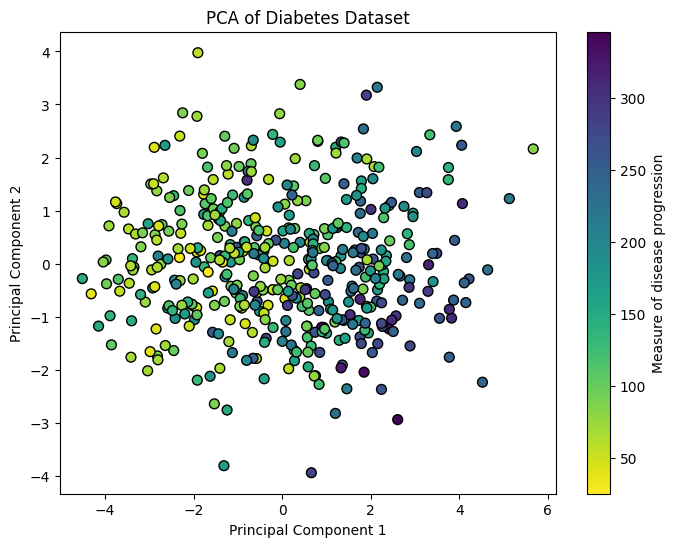

In [ ]:
# 4. Visualizar los resultados
plt.figure(figsize=(8, 6))   # en pulgadas
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c= y, edgecolor='k', cmap='viridis_r', s=50)
plt.title('PCA of Diabetes Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Measure of disease progression')
plt.show()

10.- MODELO DE CLASIFICACION. NAIVE BAYES GAUSSIAN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import numpy as np

# Cargar datos
irisdata = load_iris()
X = irisdata.data
y = irisdata.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inicializar el clasificador Gaussian Naive Bayes
model = GaussianNB()

# Entrenar el modelo
model.fit(X_train, y_train)


GaussianNB()

In [ ]:
irisdata

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# Datos nuevos
# largo_sepalo = np.array([5.1, 4.9, 5.8])
# ancho_sepalo = np.array([3.5, 3.3, 3.3])
# largo_petalo = np.array([1.4, 1.5, 5.2])
# ancho_petalo = np.array([0.2, 0.3, 1.9])

# Combinar datos en un array
#new_data =np.array([[5.8, 3.3, 5.2, 1.9], [4.9, 3.3, 1.5, 0.3], [5.1, 3.5, 1.4, 0.2]])

# Predicci√≥n de la clase para cada punto de datos nuevos
y_pred = model.predict(X_test)

# Mostrar las predicciones
y_pred


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print('y_pred shape:', y_pred.shape)

X_test shape: (30, 4)
y_test shape: (30,)
y_pred shape: (30,)


10B.- CLASIFICACION HAM O SPAM

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer en scikit-learn es una clase. Esta clase implementa tanto el
# m√©todo de vectorizaci√≥n de documentos de texto utilizando la medida TF-IDF como
# las funcionalidades necesarias para ajustar el modelo a un conjunto de datos y
# transformar esos datos en la matriz TF-IDF. Como tal, encapsula tanto el
# algoritmo de c√°lculo de TF-IDF como las estructuras de datos necesarias para


In [ ]:
df=pd.read_csv('spam[1].csv', encoding='latin-1', index_col=0)
df.head(4)
# encoding='latin-1': Especifica el tipo de codificaci√≥n de caracteres del archivo.
# Algunos archivos pueden contener caracteres que no est√°n en el formato est√°ndar
# UTF-8, y en esos casos, puede ser necesario especificar una codificaci√≥n diferente. latin-1 tambi√©n conocido como ISO-8859-1 es una de tales codificaciones.
# index_col=0: Este argumento especifica que la primera columna del archivo CSV
# debe ser usada como √≠ndice del DataFrame. Los √≠ndices en pandas son como etiquetas
#  que ayudan a identificar cada fila de datos. Si se omite este par√°metro, pandas
#  generar√° autom√°ticamente un √≠ndice secuencial para cada fila.

v2 Unnamed: 2 Unnamed: 3  \
v1                                                                              
ham   Go until jurong point, crazy.. Available only ...        NaN        NaN   
ham                       Ok lar... Joking wif u oni...        NaN        NaN   
spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN        NaN   
ham   U dun say so early hor... U c already then say...        NaN        NaN   

     Unnamed: 4  
v1               
ham         NaN  
ham         NaN  
spam        NaN  
ham         NaN

In [ ]:
#Eliminamos columnas sobrantes
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.head(4)

v2
v1                                                     
ham   Go until jurong point, crazy.. Available only ...
ham                       Ok lar... Joking wif u oni...
spam  Free entry in 2 a wkly comp to win FA Cup fina...
ham   U dun say so early hor... U c already then say...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5572 entries, ham to ham
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v2      5572 non-null   object
dtypes: object(1)
memory usage: 87.1+ KB


In [ ]:
#Vemos si hay celdas nulas o vacias
df.isnull().sum()

v2    0
dtype: int64

In [ ]:
#Eliminamos duplicados
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, ham to ham
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v2      5169 non-null   object
dtypes: object(1)
memory usage: 80.8+ KB


In [ ]:
#Reseteamos los indices
df=df.reset_index()

In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
#Le damos nombres a las columnas v1 y v2
df.columns=['Categoria','Mensaje']

df.head(4)

Categoria                                            Mensaje
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...

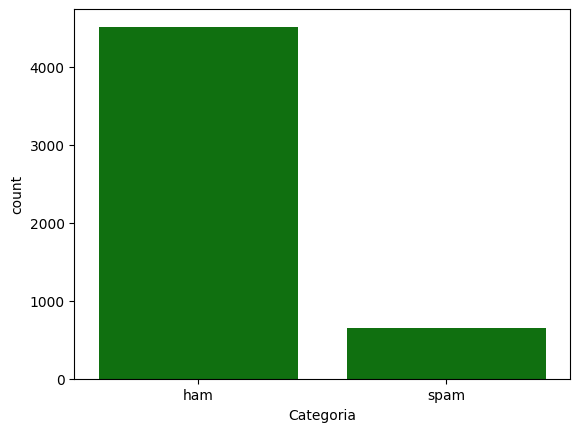

In [ ]:
#Creamos gr√°fica con la libreria seaborn
sns.countplot(data=df,x='Categoria',color='g')

plt.show()

In [ ]:
#Este c√≥digo transforma una columna de texto ('Categoria') que tiene valores
# categ√≥ricos ('spam' y 'ham') en valores num√©ricos (0 y 1). Tambien se puede
# hacer de otra manera
# df['Categoria'] = df['Categoria'].replace({'spam': 0, 'ham': 1})
df.loc[df['Categoria']=='spam','Categoria']=0
df.loc[df['Categoria']=='ham','Categoria']=1

In [ ]:
#Queremos ver todo el email de la fila 21
df.iloc[21]['Mensaje']

'I\x89√õ√∑m going to try for 2 months ha ha only joking'

In [ ]:
X=df['Mensaje']
y=df['Categoria']

In [ ]:
#Dividimos la data entre entrenamiento y test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Vemos las diferentes shapes
print(X.shape)
print(X_test.shape)
print(X_train.shape)

(5169,)
(1034,)
(4135,)


In [ ]:
#min_df=1 significa que el t√©rmino debe aparecer al menos en un documento para
#que se incluya

#"english", el vectorizador utilizar√° un conjunto predefinido de stop words para
#el ingl√©s. Esto ayuda a mejorar la eficacia del an√°lisis eliminando palabras
#como "and", "the", "is", etc.

#Aqu√≠ un resumen r√°pido del funcionamiento de TfidfVectorizer:

# Tokenizaci√≥n: Divide el texto en unidades b√°sicas o tokens, generalmente palabras o t√©rminos.
# Filtrado de Stop Words: Elimina palabras que no son √∫tiles para el an√°lisis.
# Normalizaci√≥n: Convierte todas las palabras a min√∫sculas si lowercase=True.
# C√°lculo de TF (Frecuencia del T√©rmino): Mide cu√°ntas veces aparece un t√©rmino en
# cada documento.
# C√°lculo de IDF (Frecuencia Inversa del Documento): Eval√∫a qu√© tan importante es
# un t√©rmino en el conjunto del corpus, penalizando los t√©rminos que aparecen en
# muchos documentos.
# C√°lculo de TF-IDF: Combina TF e IDF para dar un peso a cada t√©rmino en cada
# documento, reflejando su importancia relativa bas√°ndose en su frecuencia y unicidad.

clase = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
#Ajustar el Modelo y Transformar el Conjunto de Entrenamiento
#fit(): Aprende o construye el modelo de vectorizaci√≥n a partir del conjunto de
#entrenamiento X_train
X_train_vectorizada = clase.fit_transform(X_train)

#Transformar el Conjunto de Pruebas
#Convierte los textos en X_train en una matriz de caracter√≠sticas TF-IDF usando
#el vocabulario y los IDFs aprendidos.

X_test_vectorizada = clase.transform(X_test)

In [ ]:
#El m√©todo .astype("int") se utiliza para cambiar el tipo de datos  en este caso,
# a enteros (int).

y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [ ]:
print(X_train)

2142                       Those were my exact intentions
5130                            What about this one then.
2067                   Waaaat?? Lololo ok next time then!
4714    Free video camera phones with Half Price line ...
4708    Tick, tick, tick .... Where are you ? I could ...
                              ...                        
4426    Many more happy returns of the day. I wish you...
466     Nice line said by a broken heart- Plz don't cu...
3092                    Ok then i come n pick u at engin?
3772    Eek that's a lot of time especially since Amer...
860     U have a Secret Admirer who is looking 2 make ...
Name: Mensaje, Length: 4135, dtype: object


In [ ]:
#Instanciamos el modelo (algoritmo de clasificacion)
model=LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

In [ ]:
#Predecimos
#Argumento: X_train_features es la matriz de caracter√≠sticas del conjunto de
# entrenamiento, probablemente transformada en pasos previos
#predict_train_data contiene las predicciones del modelo para cada ejemplo en el
# conjunto de entrenamiento. Estas predicciones son lo que el modelo cree que
# son las etiquetas correctas para cada entrada bas√°ndose en lo que aprendi√≥
# durante el entrenamiento.
predict_train_data=model.predict(X_train_features)

accuracy_train_data=accuracy_score(y_train,predict_train_data)
#Tambien se usa accuracy_score para comparar y_test y predict_test_data
#(predicciones del conjunto de prueba) para evaluar la capacidad del modelo de
#generalizar a nuevos datos.
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9613059250302297


In [ ]:
# predicion= ['You won a prize!!']
mensajes=["Congratulations on your recent achievement! Well done.",
          "You have won the prize.",
          'Hello, I am teacher of your son.']

new_data_feature=clase.transform(mensajes)

predicion=model.predict(new_data_feature)

print(predicion)

for i in range(len(predicion)):
  if(predicion[i]==1):
      print("Ham Mail")
  else:
      print("Spam Mail")

[1 0 1]
Ham Mail
Spam Mail
Ham Mail


# 11.- MODELO DE CLUSTERIZACION. K-MEANS

**K-means** es un algoritmo de aprendizaje autom√°tico que se utiliza para agrupar datos en diferentes grupos o "clusters". Imagina que tienes un mont√≥n de puntos en un papel y quieres agruparlos en diferentes c√≠rculos, donde cada c√≠rculo contiene puntos que est√°n cerca entre s√≠. K-means hace algo similar con datos en un espacio multidimensional.

Aqu√≠ te explico c√≥mo funciona de manera sencilla:

1.  **N√∫mero de Clusters** (*K*): Primero, decides cu√°ntos grupos (clusters) quieres crear. Este n√∫mero se llama "K".

2.  **Puntos Iniciales** (*Centroides*): El algoritmo selecciona al azar "K" puntos como los centros iniciales de estos grupos. Estos puntos se llaman centroides.

3.   **Asignaci√≥n de Puntos a los Clusters**: Cada punto de tus datos se asigna al centroide m√°s cercano. Esto forma grupos iniciales.

4.   **Actualizar Centroides**: Una vez todos los puntos est√°n asignados, el algoritmo recalcula la posici√≥n de cada centroide como el centro (promedio) de todos los puntos asignados a ese cluster.

5.   **Repetir el Proceso**: El algoritmo repite los pasos 3 y 4, reasignando puntos a los centroides m√°s cercanos y recalculando la posici√≥n de los centroides, hasta que los grupos no cambian mucho o se alcanza un n√∫mero m√°ximo de iteraciones.

El resultado es un conjunto de grupos donde los puntos dentro de cada grupo son lo m√°s similares posible entre s√≠, y lo m√°s diferentes posible de los puntos en otros grupos. Es √∫til para encontrar patrones naturales en los datos o para preagrupar datos antes de aplicar otros an√°lisis m√°s complejos.

IMPORTAR LIBRERIAS Y MODELO

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

GENERAR DATOS FICTICIOS CON NUMPY

La funci√≥n `seed()` establece la semilla, al fijar la semilla del generador de n√∫meros aleatorios, aseguras que los resultados sean reproducibles. Es decir, cada vez que ejecutes el c√≥digo, obtendr√°s la misma secuencia de n√∫meros aleatorios.

Esto es muy √∫til para depurar o para cuando quieres que los resultados de un experimento sean consistentes para su revisi√≥n o comparaci√≥n.

In [ ]:
np.random.seed(42)


La funci√≥n `normal()` de NumPy es utilizada para generar muestras aleatorias de una distribuci√≥n normal (o gaussiana).

Por ejemplo, `np.random.normal(0, 1, 10)` generar√≠a un arreglo de 10 muestras aleatorias de una distribuci√≥n normal con media 0 y desviaci√≥n est√°ndar 1.

Grupo 1: Jovenes que gastan poco

In [ ]:
edad_grupo1=np.random.normal(25, 5, 100)
gasto_grupo1=np.random.normal(200, 30, 100)

Grupo 2: Edad media que gastan medio

In [ ]:
edad_grupo2=np.random.normal(45, 5, 100)
gasto_grupo2=np.random.normal(300, 50, 100)

Grupo3: Mayores que gastan mucho

In [ ]:
edad_grupo3=np.random.normal(65, 8, 100)
gasto_grupo3=np.random.normal(500, 50, 100)

En el  siguiente snippet, la funci√≥n `np.concatenate()` se utiliza para unir los arrays de `edad_grupox` y `gasto_grupox` creados anteriormente.

Primero, combina los tres arrays de edad en uno solo (`edad`) y luego hace lo mismo con los tres arrays de gasto, resultando en un √∫nico array de gasto (`gasto`).

Despu√©s, `zip(edad, gasto)` toma los elementos correspondientes de los arrays `edad` y `gasto` y los agrupa en pares. Cada par consiste en un elemento de edad y el elemento correspondiente de gasto.

Por ejemplo, si `edad = [25, 30, 35]` y `gasto = [100, 150, 200]`, entonces la sentencia `list(zip(edad, gasto))` crear√° la lista `[(25, 100), (30, 150), (35, 200)]`.

In [ ]:
edad=np.concatenate([edad_grupo1, edad_grupo2, edad_grupo3])
gasto=np.concatenate([gasto_grupo1, gasto_grupo2, gasto_grupo3])

X=np.array(list(zip(edad, gasto)))

In [ ]:
X

array([[ 27.48357077, 157.53887774],
       [ 24.30867849, 187.38064032],
       [ 28.23844269, 189.7185645 ],
       [ 32.61514928, 175.93168192],
       [ 23.82923313, 195.16142865],
       [ 23.82931522, 212.1215257 ],
       [ 32.89606408, 256.58557704],
       [ 28.83717365, 205.23733438],
       [ 22.65262807, 207.72651172],
       [ 27.71280022, 197.76662253],
       [ 22.68291154, 142.43686354],
       [ 22.67135123, 199.20458374],
       [ 26.20981136, 201.8069063 ],
       [ 15.43359878, 273.89726337],
       [ 16.37541084, 194.22917106],
       [ 22.18856235, 209.04642027],
       [ 19.9358444 , 198.95864691],
       [ 26.57123666, 164.93965887],
       [ 20.45987962, 234.28468444],
       [ 17.93848149, 222.55799098],
       [ 32.32824384, 223.73095841],
       [ 23.8711185 , 172.71837636],
       [ 25.33764102, 242.08382933],
       [ 17.87625907, 157.94446812],
       [ 22.27808638, 217.60571281],
       [ 25.55461295, 265.71366877],
       [ 19.24503211, 170.28391025],
 

In [ ]:
X[:20]

array([[ 27.48357077, 157.53887774],
       [ 24.30867849, 187.38064032],
       [ 28.23844269, 189.7185645 ],
       [ 32.61514928, 175.93168192],
       [ 23.82923313, 195.16142865],
       [ 23.82931522, 212.1215257 ],
       [ 32.89606408, 256.58557704],
       [ 28.83717365, 205.23733438],
       [ 22.65262807, 207.72651172],
       [ 27.71280022, 197.76662253],
       [ 22.68291154, 142.43686354],
       [ 22.67135123, 199.20458374],
       [ 26.20981136, 201.8069063 ],
       [ 15.43359878, 273.89726337],
       [ 16.37541084, 194.22917106],
       [ 22.18856235, 209.04642027],
       [ 19.9358444 , 198.95864691],
       [ 26.57123666, 164.93965887],
       [ 20.45987962, 234.28468444],
       [ 17.93848149, 222.55799098]])

La funci√≥n `fit()` en K-means realiza el proceso central de agrupaci√≥n: encuentra los centroides de los clusters y asigna cada punto de entrada a un cluster, bas√°ndose en la cercan√≠a a estos centroides. El resultado es un conjunto de datos dividido en grupos que pueden ser utilizados para an√°lisis o toma de decisiones posteriores.

El atributo `cluster_centers_` de KMeans almacena la ubicaci√≥n de los centroides de los clusters que se han encontrado durante la ejecuci√≥n del algoritmo KMeans mediante la funci√≥n `fit()`.

El atributo `labels_` proporciona informaci√≥n sobre la asignaci√≥n de cada punto de datos a uno de estos clusters. Cada elemento en `labels_` es un entero que representa el √≠ndice del cluster al que ha sido asignado un punto de datos espec√≠fico.

En resumen, el atributo `labels_` te dice a qu√© cluster pertenece cada punto de datos en tu conjunto.

In [ ]:
model=KMeans(n_clusters=3)   # Creamos un objeto KMeans y fijamos el n√∫mero de clusters en 3
model.fit((X))
centroids=model.cluster_centers_
labels=model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Visualizamos la matriz de los centroides

centroids

array([[ 63.90089022, 494.81285859],
       [ 44.86614241, 308.99865436],
       [ 26.15161608, 199.71292273]])

In [ ]:
labels

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [ ]:
# Visualizamos los primeros 20 arrays de la matriz X

X[:20]

array([[ 27.48357077, 157.53887774],
       [ 24.30867849, 187.38064032],
       [ 28.23844269, 189.7185645 ],
       [ 32.61514928, 175.93168192],
       [ 23.82923313, 195.16142865],
       [ 23.82931522, 212.1215257 ],
       [ 32.89606408, 256.58557704],
       [ 28.83717365, 205.23733438],
       [ 22.65262807, 207.72651172],
       [ 27.71280022, 197.76662253],
       [ 22.68291154, 142.43686354],
       [ 22.67135123, 199.20458374],
       [ 26.20981136, 201.8069063 ],
       [ 15.43359878, 273.89726337],
       [ 16.37541084, 194.22917106],
       [ 22.18856235, 209.04642027],
       [ 19.9358444 , 198.95864691],
       [ 26.57123666, 164.93965887],
       [ 20.45987962, 234.28468444],
       [ 17.93848149, 222.55799098]])

In [ ]:
# Visualizamos el elemento 0 del array 1.

X[1][0]

24.308678494144075

In [ ]:
# Visualizamos el elemento 1 del array 4.

X[4][1]

195.16142865001973

In [ ]:
# Visualizamos el array 6 de la matriz X

X[:][6]

array([ 32.89606408, 256.58557704])

In [ ]:
# Visualizamos los 20 primeros elementos de todas las filas del array X,
# de la matriz. El primer corchete representa las filas (con ':' seleccionamos
# todas las filas) y la columna 0 de la matriz X, que contiene los valores
# de la edad.
# Y el segundo corchete muestra los primeros 20 elementos ([:20]) de la columna
# 0 de la matriz X.
# El resultado devuelve un array con los 20 primeros elementos de la matriz X en
# la columna 0.

X[:, 0][:20]

array([27.48357077, 24.30867849, 28.23844269, 32.61514928, 23.82923313,
       23.82931522, 32.89606408, 28.83717365, 22.65262807, 27.71280022,
       22.68291154, 22.67135123, 26.20981136, 15.43359878, 16.37541084,
       22.18856235, 19.9358444 , 26.57123666, 20.45987962, 17.93848149])

In [ ]:
# En este caso, estamos mostrando los 20 primeros elementos de la matriz X
# en la columna 1, que representan los valores de gasto.

X[:, 1][:20]

array([157.53887774, 187.38064032, 189.7185645 , 175.93168192,
       195.16142865, 212.1215257 , 256.58557704, 205.23733438,
       207.72651172, 197.76662253, 142.43686354, 199.20458374,
       201.8069063 , 273.89726337, 194.22917106, 209.04642027,
       198.95864691, 164.93965887, 234.28468444, 222.55799098])

In [ ]:
centroids[:, 0]

array([63.90089022, 44.86614241, 26.15161608])

Vaamos a explicar como funciona el bucle for incluido en el siguiente snippet:

1.   Entendiendo `X` y `labels`:

  `X` es el array que contiene nuestros datos. Cada fila en `X` representa una observaci√≥n (peresona), y cada columna representa una caracter√≠stica de esa observaci√≥n (en nuestro caso, la primera columna es '`edad`' y la segunda es '`gastos($)`').
`labels` es un array que contiene las etiquetas de clusters asignadas a cada observaci√≥n en `X` por el algoritmo KMeans. Por ejemplo, si labels tiene un valor de 0 para la primera observaci√≥n, significa que esa observaci√≥n ha sido asignada al primer cluster.

2.   Filtrando Datos con labels==i:

   `labels==i` es una operaci√≥n que compara cada elemento en `labels` con el valor `i` (donde i ser√° 0, 1, o 2 en nuestro bucle).
El resultado de `labels==i` es un array de valores booleanos (`True` o `False`), donde cada valor es `True` si la etiqueta de cluster correspondiente es igual a `i`, y `False` si no lo es.

3.   Seleccionando Datos de `X`:

  Cuando usas `X[labels==i]`, est√°s seleccionando solo aquellas filas de `X` donde `labels==i` es `True`. Es decir, est√°s filtrando `X` para obtener solo las observaciones que han sido asignadas al cluster `i`.

4.   Accediendo a Columnas Espec√≠ficas:

   Luego, `[:, 0]` y `[:, 1]` se usan para seleccionar columnas espec√≠ficas del array filtrado `X[labels==i]`.
`[:, 0]` selecciona todos los elementos de la primera columna (que representa '`edad`') de las filas filtradas.
`[:, 1]` selecciona todos los elementos de la segunda columna (que representa '`gastos($)`') de las filas filtradas.

5.   Resultado:

   Por lo tanto, `X[labels==i][:, 0]` te da todas las edades de las observaciones que est√°n en el cluster `i`.
Y `X[labels==i][:, 1]` te da todas las cantidades gastadas de las observaciones que est√°n en el cluster `i`.

Cluster  1
[[ 36.93642064 404.61936378]
 [ 40.09245674 407.65912288]
 [ 45.34901042 409.49014666]
 [ 52.24457873 546.30887738]
 [ 60.20499982 595.47083202]
 [ 65.0419496  430.07162131]
 [ 65.37584475 528.14846183]
 [ 61.39947623 467.46787154]
 [ 69.98279946 475.64373081]
 [ 56.45903656 470.38030379]
 [ 63.86096412 456.80046152]
 [ 65.96236505 502.4260814 ]
 [ 69.11551067 458.45249418]
 [ 70.69291902 513.52284129]
 [ 56.00286327 497.48809453]
 [ 52.72708663 488.05259766]
 [ 75.22141458 454.6218169 ]
 [ 67.6585121  471.16143347]
 [ 59.01210771 537.76956129]
 [ 77.4092158  525.04585938]
 [ 65.92539707 451.12223776]
 [ 74.43437747 504.96661527]
 [ 65.54014785 537.56935617]
 [ 81.4859834  416.52973594]
 [ 79.04272674 527.16800962]
 [ 63.00828681 466.86881205]
 [ 72.77256761 528.52993343]
 [ 70.1630076  461.83704217]
 [ 75.94905246 409.75589497]
 [ 57.28061232 418.62287811]
 [ 70.48841168 502.40424733]
 [ 73.46739589 512.98612509]
 [ 50.93008411 454.78416874]
 [ 55.5339319  531.92962294]
 [ 

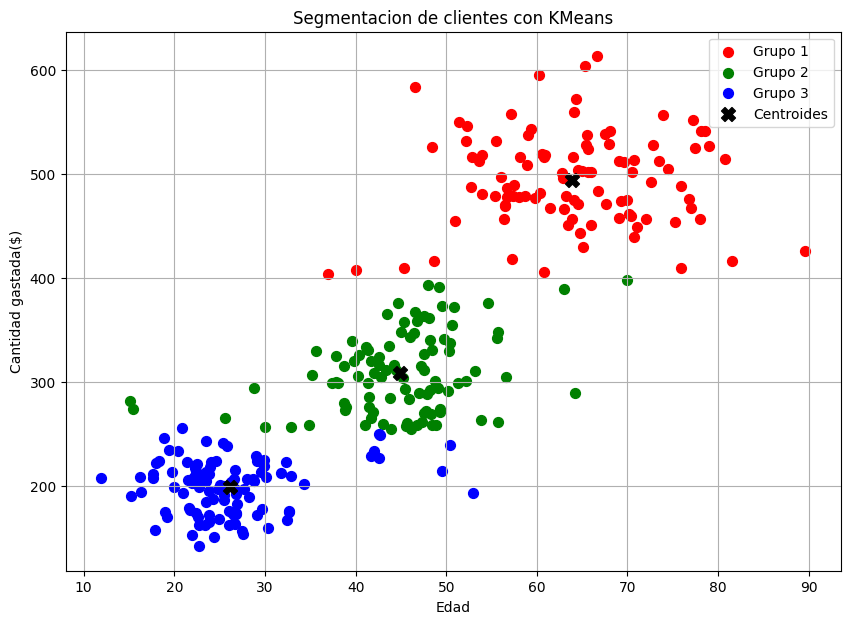

In [ ]:
plt.figure(figsize=(10, 7))
colors=['r', 'g', 'b']
for i in range (3):
  plt.scatter(X[labels==i][:, 0], X[labels==i][:, 1], c=colors[i], label=f"Grupo {i+1}", s=50)
  print("Cluster ", i+1)
  print(X[labels==i])
  print("Edad: ",X[labels==i][:, 0], "Gastos:", X[labels==i][:, 1], sep="\n")
  print("-------------------------------------------------")
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroides')
plt.title('Segmentacion de clientes con KMeans')
plt.xlabel('Edad')
plt.ylabel('Cantidad gastada($)')
plt.legend()
plt.grid(True)
plt.show()

# 12.- MODELO DE CLUSTERIZACION. DBSCAN

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Carga de datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
 #Preprocesamiento de datos
# Eliminaremos 'Region' y 'Channel' para enfocarnos en los atributos de gasto
df = df.drop(['Region', 'Channel'], axis=1)

#Normaliza los datos para que tengan media cero y desviaci√≥n est√°ndar uno. Esto
# es importante porque DBSCAN es sensible a la escala de los atributos.
scaler= StandardScaler()

#Fit: Aprende los par√°metros necesarios para realizar una transformaci√≥n adecuada
# de los datos. Por ejemplo, en el caso de StandardScaler, aprende la media y la
#desviaci√≥n est√°ndar de cada caracter√≠stica de los datos. ESTE FIT ES DIFERENTE
#AL FIT DE ENTRENAMIENTO DEL MODELO
# Transform: Aplica la transformaci√≥n a los datos utilizando los par√°metros aprendidos
#en el paso de "fit". Para StandardScaler, esto significa restar la media y dividir
#por la desviaci√≥n est√°ndar para cada caracter√≠stica, normalizando as√≠ los datos.

data_scaled = scaler.fit_transform(df)


# Aplicar DBSCAN
# Se elige un eps y min_samples que parezcan adecuados para el tama√±o y la dispersi√≥n de los datos
model = DBSCAN(eps=2, min_samples=5) #eps =distancia m√°xima entre dos puntos para que
# se consideren en la misma "vecindad"
#min_samples: n√∫mero m√≠nimo de puntos que deben encontrarse dentro del radio
# eps de un punto para que ese punto sea considerado un punto central (core point)

clusters = model.fit_predict(data_scaled)

#Fit:este paso implica que el modelo aprenda o "ajuste" los datos que se le
#proporcionan. Para DBSCAN, esto significa identificar los puntos centrales
#(core points), establecer cu√°les puntos son puntos frontera (border points), etc.

#Predict:A diferencia de otros algoritmos donde predict generalmente se refiere
# a hacer predicciones sobre nuevos datos, en el contexto de clustering este "predict"
# simplemente asigna cada punto del conjunto de datos a un cluster espec√≠fico basado
# en el aprendizaje realizado en el paso de "fit". Los clusters son identificados
# durante el ajuste, y cada punto de los datos es etiquetado con el √≠ndice del
# cluster al que pertenece o marcado como ruido.

# Calcular el coeficiente de silueta

silhouette_avg = silhouette_score(data_scaled, clusters)
print(f"Coeficiente de silueta para los clusters formados: {silhouette_avg:.3f}")

Coeficiente de silueta para los clusters formados: 0.749


In [ ]:
# El coeficiente de silueta es una m√©trica que se utiliza para evaluar la calidad
# del clustering en un an√°lisis de datos. Este coeficiente puede variar
# entre -1 y +1, donde:
# +1: Indica que los clusters est√°n muy bien definidos y separados entre s√≠. Los
# puntos dentro de un cluster est√°n muy cerca entre ellos, y muy lejos de los
# puntos de otros clusters.
# 0: Sugiere que los clusters se est√°n empezando a solapar. No hay una distinci√≥n
# clara entre los clusters, y los puntos podr√≠an pertenecer igualmente a uno u
# otro cluster.
# -1: Implica que los puntos han sido asignados a los clusters incorrectos. Los
# puntos est√°n m√°s cerca de los puntos de otros clusters que de los puntos de su
# propio cluster.

# Un coeficiente de 0.749 es bastante alto, lo que sugiere que los clusters que
# ha identificado DBSCAN est√°n bastante bien definidos y separados, lo cual es un
# indicativo de un buen clustering.

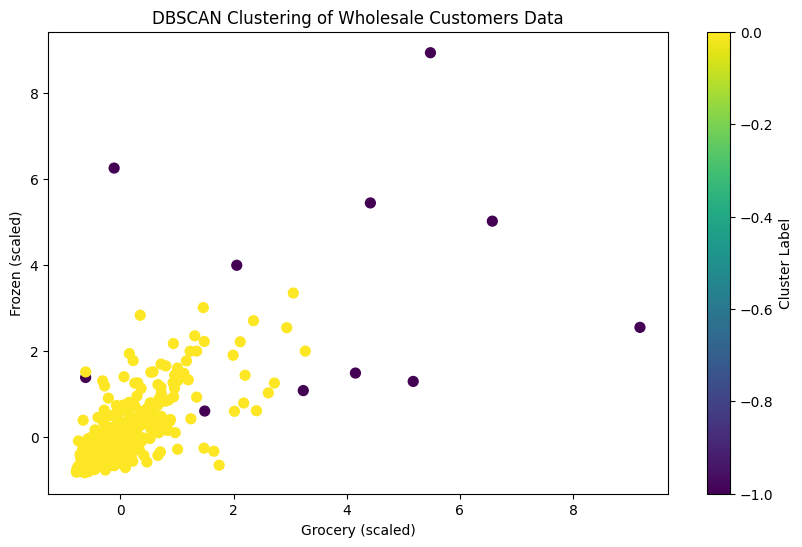

In [ ]:
# Visualizaci√≥n de los resultados de forma escalada

#La gr√°fica ayuda a visualizar c√≥mo el algoritmo DBSCAN ha agrupado a los
#clientes en funci√≥n de sus compras de "Grocery" y "Frozen". Permite identificar
#f√°cilmente los diferentes grupos de clientes que tienen comportamientos de compra
#similares y los clientes que no encajan en ning√∫n grupo (ruido). Esto puede ser
#√∫til para tareas de segmentaci√≥n de mercado, identificaci√≥n de patrones de compra
#y toma de decisiones comerciales basadas en el comportamiento del cliente.

# En el contexto de la gr√°fica de cl√∫steres que se describe, la acumulaci√≥n de
# puntos amarillos cerca del eje (0,0) indica que existe un grupo significativo de
# clientes que se caracterizan por valores bajos tanto en sus compras de comestibles
# como de productos congelados.

# Interpretaciones posibles:

# 1.- Comportamiento de compra: Estos clientes podr√≠an ser aquellos que realizan
# compras peque√±as de ambos tipos de productos, o que no compran con frecuencia
# ninguno de ellos.
# 2.- Segmentaci√≥n de mercado: Este grupo podr√≠a representar un segmento de mercado
# distinto con necesidades y preferencias espec√≠ficas. Por ejemplo, podr√≠an ser
# estudiantes con un presupuesto limitado, personas mayores que viven solas, o
# clientes que prefieren comprar productos frescos en mercados locales.
# 3.- Estrategia de marketing: La identificaci√≥n de este grupo puede ser √∫til para
# desarrollar estrategias de marketing espec√≠ficas que se adapten a sus necesidades.
# Por ejemplo, se podr√≠an ofrecer promociones en productos b√°sicos o combos de
# comestibles y congelados, o se podr√≠an crear programas de fidelizaci√≥n para
# incentivar la compra m√°s frecuente.

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 1], data_scaled[:, 2], c=clusters, cmap='viridis', s=50)  # Visualizando bas√°ndonos en dos dimensiones
plt.title('DBSCAN Clustering of Wholesale Customers Data')
plt.xlabel('Grocery (scaled)')
plt.ylabel('Frozen (scaled)')
plt.colorbar(label='Cluster Label')
plt.show()

# 12B.- RED NEURONAL

In [ ]:
# Este c√≥digo es un ejemplo de c√≥mo usar el clasificador de perceptr√≥n multicapa
# (MLPClassifier) desde la biblioteca de aprendizaje autom√°tico scikit-learn para
# entrenar un modelo de clasificaci√≥n y  hacer predicciones basadas en datos de prueba.

# La convergencia del modelo en el contexto de los algoritmos de aprendizaje
# autom√°tico, especialmente en el entrenamiento de redes neuronales como el
# MLP (Perceptr√≥n Multicapa), se refiere a la estabilizaci√≥n del proceso de
# aprendizaje hacia un estado donde el modelo ya no mejora significativamente su
# rendimiento con iteraciones adicionales. En t√©rminos m√°s t√©cnicos, la convergencia
# ocurre cuando los cambios en los pesos y sesgos de la red neuronal entre iteraciones
# consecutivas se vuelven insignificantes, indicando que el modelo ha encontrado un
# conjunto √≥ptimo o casi √≥ptimo de par√°metros. Aqu√≠ hay algunos puntos clave sobre
# la convergencia del modelo:

# Minimizaci√≥n de la funci√≥n de p√©rdida:
# El objetivo principal en el entrenamiento de una red neuronal es minimizar una
# funci√≥n de p√©rdida (o coste), que mide cu√°n bien el modelo predice el resultado
# correcto. La convergencia se alcanza cuando la funci√≥n de p√©rdida deja de disminuir
# de manera significativa, lo que sugiere que el modelo ha aprendido lo m√°ximo posible
# de los datos de entrenamiento dados.

# Estabilidad de los par√°metros:
# Durante el entrenamiento, los pesos y sesgos de la red se ajustan mediante
# algoritmos como el descenso de gradiente. La convergencia se ha alcanzado cuando
# estos ajustes son m√≠nimos y los par√°metros del modelo se estabilizan.

# N√∫mero de iteraciones:
# Algunos modelos, como el MLPClassifier, permiten especificar un n√∫mero m√°ximo de
# iteraciones (max_iter) para el entrenamiento. Si el modelo no ha convergido despu√©s
# de estas iteraciones, el entrenamiento se detiene. Esto puede ser un signo de que
# se necesita ajustar la tasa de aprendizaje, el n√∫mero de iteraciones, o revisar
# si el modelo es adecuado para los datos.

# Tasa de aprendizaje y ajustes de hiperpar√°metros:
# La tasa de aprendizaje es crucial para la convergencia. Una tasa demasiado alta
# puede hacer que el modelo oscile y no converja, mientras que una tasa demasiado
# baja puede hacer que el entrenamiento sea ineficientemente lento y potencialmente
# quedarse atascado en m√≠nimos locales.

# Sobreajuste y validaci√≥n:
# A veces, un modelo puede parecer que ha convergido en los datos de entrenamiento,
# pero simplemente ha memorizado los datos (sobreajuste) y no generaliza bien a nuevos
# datos. Es crucial utilizar t√©cnicas de validaci√≥n como la validaci√≥n cruzada para
# asegurar que la convergencia del modelo corresponde a una verdadera generalizaci√≥n
# y no a un sobreajuste.

# En resumen, la convergencia indica que un modelo de aprendizaje autom√°tico ha
# encontrado una soluci√≥n estable y efectiva al problema dado, pero tambi√©n es
# importante verificar que esta soluci√≥n sea robusta y generalizable m√°s all√° de
# los datos de entrenamiento espec√≠ficos.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
!wget -O winequality-red.csv https://raw.githubusercontent.com/CharlieScot/Intelligencia-Artificial/main/MODULO_4/winequality-red.csv?token=GHSAT0AAAAAACK7WEBRZOTFEHC5YZT7G5A2ZLIQOMQ

--2024-05-04 15:05:19--  https://raw.githubusercontent.com/CharlieScot/Intelligencia-Artificial/main/MODULO_4/winequality-red.csv?token=GHSAT0AAAAAACK7WEBRZOTFEHC5YZT7G5A2ZLIQOMQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‚Äòwinequality-red.csv‚Äô

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s    in 0.02s   

2024-05-04 15:05:19 (4.75 MB/s) - ‚Äòwinequality-red.csv‚Äô saved [100951/100951]



In [ ]:
wine=pd.read_csv('winequality-red.csv', sep=',')

In [ ]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Preprocessing Data
bins= (2, 6.5, 8)
group_names= ['bad', 'good']
wine['quality']=pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [ ]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [ ]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [ ]:
wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        0  
4      9.4        0  
5      9.4        0  
6      9.4        0  
7     10.0        1  
8      9.5        1  
9     10.5        0

In [ ]:
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [ ]:
#Now separate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [ ]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Applying Standard scaling to get optimized result
#La mayoria de los modelos necesitan scaling, los valores de nuestra base de
#datos son muy grandes comparados con otros y eso puede hacer que el modelo
#se concentre demasiado en los valores grandes

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#ahora los valores estan menos dispersos y oscilan entre -2 y 4 mas o menos
X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

In [ ]:
# MLPClassifier es un tipo de red neuronal artificial conocido como perceptr√≥n
# multicapa. Se utiliza com√∫nmente para clasificaci√≥n.
# .- hidden_layer_sizes=(11, 11, 11) define la arquitectura de la red neuronal. Aqu√≠
# se especifica que la red tiene tres capas ocultas, cada una con 11 neuronas. El
# n√∫mero y tama√±o de las capas ocultas son par√°metros que puedes ajustar dependiendo
# de la complejidad de la tarea.
# .- max_iter=500 indica el n√∫mero m√°ximo de iteraciones o √©pocas que el solucionador
# utilizar√° para la convergencia del modelo. Si el modelo alcanza este l√≠mite sin
# converger, el entrenamiento se detiene.

mlpc=MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc=mlpc.predict(X_test)
pred_mlpc

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X_new= [[7.3, 0.58, 0.00, 2.0, 0.065, 15.0, 21.0, 0.9946, 3.36, 0.47, 10.0]]
pred_mlpc=mlpc.predict(X_new)
pred_mlpc

array([0])

In [ ]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       273
           1       0.53      0.34      0.42        47

    accuracy                           0.86       320
   macro avg       0.71      0.64      0.67       320
weighted avg       0.84      0.86      0.85       320

[[259  14]
 [ 31  16]]
